# Progetto data Analytics

## Installing libraries

In [0]:
#for install libraries
!sudo apt install build-essential python-dev libxml2 libxml2-dev zlib1g-dev
!sudo pip install cairocffi
!pip install python-igraph
!pip install louvain

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
python-dev is already the newest version (2.7.15~rc1-1).
zlib1g-dev is already the newest version (1:1.2.11.dfsg-0ubuntu2).
zlib1g-dev set to manually installed.
libxml2 is already the newest version (2.9.4+dfsg1-6.1ubuntu1.2).
libxml2 set to manually installed.
libxml2-dev is already the newest version (2.9.4+dfsg1-6.1ubuntu1.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
     |████████████████████████████████| 71kB 2.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/e7/5d/6f/fc3c2364dfd3c4cfd15d786b156077c52209d9af45496fdf12
Successfully built cairocffi
     |████████████████████████████████| 378kB 2.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/41/d6/02/34eeba

#### Execute this only if you are Alex Caselli on Colab

In [43]:
from google.colab import drive
import networkx as nx
import igraph as ig
import louvain
from collections import OrderedDict
import numpy as np
drive.mount('/content/gdrive')
baseURL = '/content/gdrive/My Drive/Data Analytics/';

ModuleNotFoundError: No module named 'google'

## Import Libraries and set local path

In [1]:
import networkx as nx
import igraph as ig
import louvain
from collections import OrderedDict
import numpy as np
import csv
from tqdm import tqdm_notebook as tqdm

baseURL = '../'

# Creation of compact graph (attack, trade and message) and Total Graph and the Alliance Graph (compact and not)
You don't have to run this code if you already have all the graph files in your dataset graphml folder; but **run for another one check**


## Create compact attack graph

In [4]:
# Creation of 30 plain graphs
nGraph = 30
compactAttackGraph = nx.DiGraph()


checkGraph = ig.Graph()
edgesDict = dict()

attackCount = 0

#for each day do
for i in range(0, nGraph):
    
    #Create a new plain graph and read the multigraph for that day
    attackGraph = nx.MultiDiGraph()
    compactAttackGraph = nx.DiGraph()
    checkGraph = ig.Graph()
    attackGraph = nx.read_graphml(baseURL + "Dataset/Graphml-File/Multi/Attacks-Network-Graphml/attacks-timestamped-2009-12-"+str(i+1)+".graphml")
    checkGraph = checkGraph.Read_GraphML(baseURL + "Dataset/Graphml-File/Multi/Attacks-Network-Graphml/attacks-timestamped-2009-12-"+str(i+1)+".graphml")
    
    #initialize the counters
    attackCount = 0
    sumOfVertex = 0
    nStep = 0
    zeroOutDegreeCont = 0
    edgesDict = dict()

    print("DAY: ", (i+1))
    print("START GRAPH")
    print(nx.info(attackGraph))
    print("")
    
    #for each edge of the multigraph
    for itr in list(attackGraph.edges(None, True, True)):
        # print(itr)
        #create a tmp dictionary to count the numbers of messages and trades between each couple of nodes
        if itr[0] in edgesDict:
            if itr[1] in edgesDict[itr[0]]:
                edgesDict[itr[0]][itr[1]] += 1
                attackCount += 1
            else:
                edgesDict[itr[0]][itr[1]] = 1
                attackCount += 1
        else:
            edgesDict[itr[0]] = {}
            edgesDict[itr[0]][itr[1]] = 1
            attackCount += 1

    #For each edges saved in the dictionary add it to the plain graph
    for fromVertex in edgesDict:
        for toVertex in edgesDict[fromVertex]:
            nStep += 1
            compactAttackGraph.add_edge(int(fromVertex), int(toVertex), Weight = edgesDict[fromVertex][toVertex])
            '''print("FROM VERTEX: ", fromVertex)
            print("VALUE: ", edgesDict[fromVertex])
            print("TO VERTEX: ", toVertex)
            print("VALUE: ", edgesDict[fromVertex][toVertex])
            print("SUM: ", sum(edgesDict[fromVertex][toVertex]))'''
            sumOfVertex += edgesDict[fromVertex][toVertex]

        
    print("FROM VERTICES NUMBER IN DICTIONARY: ", len(edgesDict))
    print("START GRAPH ALL VERTICES: ", len(attackGraph))

    #Count number of inactive nodes
    for vertex in checkGraph.vs:
        if vertex.outdegree() == 0:
            zeroOutDegreeCont += 1
    print("VERTICES WITH OUTDEGREE 0:", zeroOutDegreeCont)
    print("")

    print("END GRAPH")
    print(nx.info(compactAttackGraph))
    print("")
    # for itr in realAllianceGraph.edges_iter(None, True, True):
        # print(itr)
    print("SUM OF WEIGHT BEFORE MULTIPLY (START GRAPH EDGES NUMBER): ", sumOfVertex)
    print("NUMBER OF STEP (END GRAPH EDGES NUMBER): ", nStep)
    print("NUMBER OF ATTACK EDGES MET: ", attackCount)
    nx.write_graphml(compactAttackGraph, baseURL + "Dataset/Graphml-File/Compact/AttackGraph/cAttack-2009-12-"+str(i+1)+".graphml")
    print('----------------------------------------------------------------------')

    

DAY:  1
START GRAPH
Name: 
Type: MultiDiGraph
Number of nodes: 2807
Number of edges: 32997
Average in degree:  11.7553
Average out degree:  11.7553

FROM VERTICES NUMBER IN DICTIONARY:  938
START GRAPH ALL VERTICES:  2807
VERTICES WITH OUTDEGREE 0: 1869

END GRAPH
Name: 
Type: DiGraph
Number of nodes: 2807
Number of edges: 7476
Average in degree:   2.6633
Average out degree:   2.6633

SUM OF WEIGHT BEFORE MULTIPLY (START GRAPH EDGES NUMBER):  32997
NUMBER OF STEP (END GRAPH EDGES NUMBER):  7476
NUMBER OF ATTACK EDGES MET:  32997
----------------------------------------------------------------------
DAY:  2
START GRAPH
Name: 
Type: MultiDiGraph
Number of nodes: 2802
Number of edges: 32782
Average in degree:  11.6995
Average out degree:  11.6995

FROM VERTICES NUMBER IN DICTIONARY:  927
START GRAPH ALL VERTICES:  2802
VERTICES WITH OUTDEGREE 0: 1875

END GRAPH
Name: 
Type: DiGraph
Number of nodes: 2802
Number of edges: 7177
Average in degree:   2.5614
Average out degree:   2.5614

SUM OF

DAY:  15
START GRAPH
Name: 
Type: MultiDiGraph
Number of nodes: 1992
Number of edges: 19969
Average in degree:  10.0246
Average out degree:  10.0246

FROM VERTICES NUMBER IN DICTIONARY:  764
START GRAPH ALL VERTICES:  1992
VERTICES WITH OUTDEGREE 0: 1228

END GRAPH
Name: 
Type: DiGraph
Number of nodes: 1992
Number of edges: 4587
Average in degree:   2.3027
Average out degree:   2.3027

SUM OF WEIGHT BEFORE MULTIPLY (START GRAPH EDGES NUMBER):  19969
NUMBER OF STEP (END GRAPH EDGES NUMBER):  4587
NUMBER OF ATTACK EDGES MET:  19969
----------------------------------------------------------------------
DAY:  16
START GRAPH
Name: 
Type: MultiDiGraph
Number of nodes: 1990
Number of edges: 22134
Average in degree:  11.1226
Average out degree:  11.1226

FROM VERTICES NUMBER IN DICTIONARY:  742
START GRAPH ALL VERTICES:  1990
VERTICES WITH OUTDEGREE 0: 1248

END GRAPH
Name: 
Type: DiGraph
Number of nodes: 1990
Number of edges: 4705
Average in degree:   2.3643
Average out degree:   2.3643

SUM 

DAY:  29
START GRAPH
Name: 
Type: MultiDiGraph
Number of nodes: 1685
Number of edges: 16513
Average in degree:   9.8000
Average out degree:   9.8000

FROM VERTICES NUMBER IN DICTIONARY:  646
START GRAPH ALL VERTICES:  1685
VERTICES WITH OUTDEGREE 0: 1039

END GRAPH
Name: 
Type: DiGraph
Number of nodes: 1685
Number of edges: 4008
Average in degree:   2.3786
Average out degree:   2.3786

SUM OF WEIGHT BEFORE MULTIPLY (START GRAPH EDGES NUMBER):  16513
NUMBER OF STEP (END GRAPH EDGES NUMBER):  4008
NUMBER OF ATTACK EDGES MET:  16513
----------------------------------------------------------------------
DAY:  30
START GRAPH
Name: 
Type: MultiDiGraph
Number of nodes: 1643
Number of edges: 16749
Average in degree:  10.1942
Average out degree:  10.1942

FROM VERTICES NUMBER IN DICTIONARY:  643
START GRAPH ALL VERTICES:  1643
VERTICES WITH OUTDEGREE 0: 1000

END GRAPH
Name: 
Type: DiGraph
Number of nodes: 1643
Number of edges: 3727
Average in degree:   2.2684
Average out degree:   2.2684

SUM 

## Create compact trade graph

In [5]:
# Creation of 30 plain graphs
nGraph = 30
compactTradeGraph = nx.DiGraph()


checkGraph = ig.Graph()
edgesDict = dict()

cont = 0
tradeCount = 0

#for each day do
for i in range(0, nGraph):
    
    #Create a new plain graph and read the multigraph for that day
    tradeGraph = nx.MultiDiGraph()
    compactTradeGraph = nx.DiGraph()
    checkGraph = ig.Graph()
    tradeGraph = nx.read_graphml(baseURL + "Dataset/Graphml-File/Multi/Trades-Network-Graphml/trades-timestamped-2009-12-"+str(i+1)+".graphml")
    checkGraph = checkGraph.Read_GraphML(baseURL + "Dataset/Graphml-File/Multi/Trades-Network-Graphml/trades-timestamped-2009-12-"+str(i+1)+".graphml")
    
    #initialize the counters
    tradeCount = 0
    sumOfVertex = 0
    nStep = 0
    zeroOutDegreeCont = 0
    edgesDict = dict()

    print("DAY: ", (i+1))
    print("START GRAPH")
    print(nx.info(tradeGraph))
    print("")
    
    #for each edge of the multigraph
    for itr in list(tradeGraph.edges(None, True, True)):
        # print(itr)
        #create a tmp dictionary to count the numbers of messages and trades between each couple of nodes
        if itr[0] in edgesDict:
            if itr[1] in edgesDict[itr[0]]:
                edgesDict[itr[0]][itr[1]] += 1
                tradeCount += 1
            else:
                edgesDict[itr[0]][itr[1]] = 1
                tradeCount += 1
        else:
            edgesDict[itr[0]] = {}
            edgesDict[itr[0]][itr[1]] = 1
            tradeCount += 1

    
    #For each edges saved in the dictionary add it to the plain graph
    for fromVertex in edgesDict:
        for toVertex in edgesDict[fromVertex]:
            if fromVertex == "2789":
                print(fromVertex)
                cont += edgesDict[fromVertex][toVertex]
            nStep += 1
            compactTradeGraph.add_edge(int(fromVertex), int(toVertex), Weight = edgesDict[fromVertex][toVertex])
            '''print("FROM VERTEX: ", fromVertex)
            print("VALUE: ", edgesDict[fromVertex])
            print("TO VERTEX: ", toVertex)
            print("VALUE: ", edgesDict[fromVertex][toVertex])
            print("SUM: ", sum(edgesDict[fromVertex][toVertex]))'''
            sumOfVertex += edgesDict[fromVertex][toVertex]

        
    print("FROM VERTICES NUMBER IN DICTIONARY: ", len(edgesDict))
    print("START GRAPH ALL VERTICES: ", len(tradeGraph))

    #Count number of inactive nodes
    for vertex in checkGraph.vs:
        if vertex.outdegree() == 0:
            zeroOutDegreeCont += 1
    print("VERTICES WITH OUTDEGREE 0:", zeroOutDegreeCont)
    print("")

    print("END GRAPH")
    print(nx.info(compactTradeGraph))
    print("")
    # for itr in realAllianceGraph.edges_iter(None, True, True):
        # print(itr)
    print("SUM OF WEIGHT BEFORE MULTIPLY (START GRAPH EDGES NUMBER): ", sumOfVertex)
    print("NUMBER OF STEP (END GRAPH EDGES NUMBER): ", nStep)
    print("NUMBER OF TRADE EDGES MET: ", tradeCount)
    nx.write_graphml(compactTradeGraph, baseURL + "Dataset/Graphml-File/Compact/TradeGraph/cTrade-2009-12-"+str(i+1)+".graphml")
    print('----------------------------------------------------------------------')
print(cont)
    

DAY:  1
START GRAPH
Name: 
Type: MultiDiGraph
Number of nodes: 1336
Number of edges: 9390
Average in degree:   7.0284
Average out degree:   7.0284

2789
FROM VERTICES NUMBER IN DICTIONARY:  1209
START GRAPH ALL VERTICES:  1336
VERTICES WITH OUTDEGREE 0: 127

END GRAPH
Name: 
Type: DiGraph
Number of nodes: 1336
Number of edges: 4909
Average in degree:   3.6744
Average out degree:   3.6744

SUM OF WEIGHT BEFORE MULTIPLY (START GRAPH EDGES NUMBER):  9390
NUMBER OF STEP (END GRAPH EDGES NUMBER):  4909
NUMBER OF TRADE EDGES MET:  9390
----------------------------------------------------------------------
DAY:  2
START GRAPH
Name: 
Type: MultiDiGraph
Number of nodes: 1314
Number of edges: 8710
Average in degree:   6.6286
Average out degree:   6.6286

2789
FROM VERTICES NUMBER IN DICTIONARY:  1188
START GRAPH ALL VERTICES:  1314
VERTICES WITH OUTDEGREE 0: 126

END GRAPH
Name: 
Type: DiGraph
Number of nodes: 1314
Number of edges: 4659
Average in degree:   3.5457
Average out degree:   3.5457

S

DAY:  15
START GRAPH
Name: 
Type: MultiDiGraph
Number of nodes: 1199
Number of edges: 10175
Average in degree:   8.4862
Average out degree:   8.4862

2789
FROM VERTICES NUMBER IN DICTIONARY:  1097
START GRAPH ALL VERTICES:  1199
VERTICES WITH OUTDEGREE 0: 102

END GRAPH
Name: 
Type: DiGraph
Number of nodes: 1199
Number of edges: 4799
Average in degree:   4.0025
Average out degree:   4.0025

SUM OF WEIGHT BEFORE MULTIPLY (START GRAPH EDGES NUMBER):  10175
NUMBER OF STEP (END GRAPH EDGES NUMBER):  4799
NUMBER OF TRADE EDGES MET:  10175
----------------------------------------------------------------------
DAY:  16
START GRAPH
Name: 
Type: MultiDiGraph
Number of nodes: 1146
Number of edges: 9866
Average in degree:   8.6091
Average out degree:   8.6091

2789
FROM VERTICES NUMBER IN DICTIONARY:  1053
START GRAPH ALL VERTICES:  1146
VERTICES WITH OUTDEGREE 0: 93

END GRAPH
Name: 
Type: DiGraph
Number of nodes: 1146
Number of edges: 4924
Average in degree:   4.2967
Average out degree:   4.296

DAY:  29
START GRAPH
Name: 
Type: MultiDiGraph
Number of nodes: 991
Number of edges: 8606
Average in degree:   8.6842
Average out degree:   8.6842

FROM VERTICES NUMBER IN DICTIONARY:  896
START GRAPH ALL VERTICES:  991
VERTICES WITH OUTDEGREE 0: 95

END GRAPH
Name: 
Type: DiGraph
Number of nodes: 991
Number of edges: 4125
Average in degree:   4.1625
Average out degree:   4.1625

SUM OF WEIGHT BEFORE MULTIPLY (START GRAPH EDGES NUMBER):  8606
NUMBER OF STEP (END GRAPH EDGES NUMBER):  4125
NUMBER OF TRADE EDGES MET:  8606
----------------------------------------------------------------------
DAY:  30
START GRAPH
Name: 
Type: MultiDiGraph
Number of nodes: 967
Number of edges: 8521
Average in degree:   8.8118
Average out degree:   8.8118

FROM VERTICES NUMBER IN DICTIONARY:  880
START GRAPH ALL VERTICES:  967
VERTICES WITH OUTDEGREE 0: 87

END GRAPH
Name: 
Type: DiGraph
Number of nodes: 967
Number of edges: 4004
Average in degree:   4.1406
Average out degree:   4.1406

SUM OF WEIGHT BEFOR

## Create compact message graph

In [6]:
# Creation of 30 plain graphs
nGraph = 30
compactMessageGraph = nx.DiGraph()


checkGraph = ig.Graph()
edgesDict = dict()

messageCount = 0

#for each day do
for i in range(0, nGraph):
    
    #Create a new plain graph and read the multigraph for that day
    messageGraph = nx.MultiDiGraph()
    compactMessageGraph = nx.DiGraph()
    checkGraph = ig.Graph()
    messageGraph = nx.read_graphml(baseURL + "Dataset/Graphml-File/Multi/Messages-Network-Graphml/messages-timestamped-2009-12-"+str(i+1)+".graphml")
    checkGraph = checkGraph.Read_GraphML(baseURL + "Dataset/Graphml-File/Multi/Messages-Network-Graphml/messages-timestamped-2009-12-"+str(i+1)+".graphml")
    
    #initialize the counters
    messageCount = 0
    sumOfVertex = 0
    nStep = 0
    zeroOutDegreeCont = 0
    edgesDict = dict()

    print("DAY: ", (i+1))
    print("START GRAPH")
    print(nx.info(messageGraph))
    print("")
    
    #for each edge of the multigraph
    for itr in list(messageGraph.edges(None, True, True)):
        # print(itr)
        #create a tmp dictionary to count the numbers of messages and trades between each couple of nodes
        if itr[0] in edgesDict:
            if itr[1] in edgesDict[itr[0]]:
                edgesDict[itr[0]][itr[1]] += 1
                messageCount += 1
            else:
                edgesDict[itr[0]][itr[1]] = 1
                messageCount += 1
        else:
            edgesDict[itr[0]] = {}
            edgesDict[itr[0]][itr[1]] = 1
            messageCount += 1

    #For each edges saved in the dictionary add it to the plain graph
    for fromVertex in edgesDict:
        for toVertex in edgesDict[fromVertex]:
            nStep += 1
            compactMessageGraph.add_edge(int(fromVertex), int(toVertex), Weight = edgesDict[fromVertex][toVertex])
            '''print("FROM VERTEX: ", fromVertex)
            print("VALUE: ", edgesDict[fromVertex])
            print("TO VERTEX: ", toVertex)
            print("VALUE: ", edgesDict[fromVertex][toVertex])
            print("SUM: ", sum(edgesDict[fromVertex][toVertex]))'''
            sumOfVertex += edgesDict[fromVertex][toVertex]

        
    print("FROM VERTICES NUMBER IN DICTIONARY: ", len(edgesDict))
    print("START GRAPH ALL VERTICES: ", len(messageGraph))

    #Count number of inactive nodes
    for vertex in checkGraph.vs:
        if vertex.outdegree() == 0:
            zeroOutDegreeCont += 1
    print("VERTICES WITH OUTDEGREE 0:", zeroOutDegreeCont)
    print("")

    print("END GRAPH")
    print(nx.info(compactMessageGraph))
    print("")
    # for itr in realAllianceGraph.edges_iter(None, True, True):
        # print(itr)
    print("SUM OF WEIGHT BEFORE MULTIPLY (START GRAPH EDGES NUMBER): ", sumOfVertex)
    print("NUMBER OF STEP (END GRAPH EDGES NUMBER): ", nStep)
    print("NUMBER OF MESSAGE EDGES MET: ", messageCount)
    nx.write_graphml(compactMessageGraph, baseURL + "Dataset/Graphml-File/Compact/MessageGraph/cMessage-2009-12-"+str(i+1)+".graphml")
    print('----------------------------------------------------------------------')

    

DAY:  1
START GRAPH
Name: 
Type: MultiDiGraph
Number of nodes: 1963
Number of edges: 16346
Average in degree:   8.3271
Average out degree:   8.3271

FROM VERTICES NUMBER IN DICTIONARY:  1168
START GRAPH ALL VERTICES:  1963
VERTICES WITH OUTDEGREE 0: 795

END GRAPH
Name: 
Type: DiGraph
Number of nodes: 1963
Number of edges: 6485
Average in degree:   3.3036
Average out degree:   3.3036

SUM OF WEIGHT BEFORE MULTIPLY (START GRAPH EDGES NUMBER):  16346
NUMBER OF STEP (END GRAPH EDGES NUMBER):  6485
NUMBER OF MESSAGE EDGES MET:  16346
----------------------------------------------------------------------
DAY:  2
START GRAPH
Name: 
Type: MultiDiGraph
Number of nodes: 2100
Number of edges: 15019
Average in degree:   7.1519
Average out degree:   7.1519

FROM VERTICES NUMBER IN DICTIONARY:  1143
START GRAPH ALL VERTICES:  2100
VERTICES WITH OUTDEGREE 0: 957

END GRAPH
Name: 
Type: DiGraph
Number of nodes: 2100
Number of edges: 6105
Average in degree:   2.9071
Average out degree:   2.9071

SUM O

DAY:  15
START GRAPH
Name: 
Type: MultiDiGraph
Number of nodes: 1777
Number of edges: 11805
Average in degree:   6.6432
Average out degree:   6.6432

FROM VERTICES NUMBER IN DICTIONARY:  969
START GRAPH ALL VERTICES:  1777
VERTICES WITH OUTDEGREE 0: 808

END GRAPH
Name: 
Type: DiGraph
Number of nodes: 1777
Number of edges: 5302
Average in degree:   2.9837
Average out degree:   2.9837

SUM OF WEIGHT BEFORE MULTIPLY (START GRAPH EDGES NUMBER):  11805
NUMBER OF STEP (END GRAPH EDGES NUMBER):  5302
NUMBER OF MESSAGE EDGES MET:  11805
----------------------------------------------------------------------
DAY:  16
START GRAPH
Name: 
Type: MultiDiGraph
Number of nodes: 1785
Number of edges: 13474
Average in degree:   7.5485
Average out degree:   7.5485

FROM VERTICES NUMBER IN DICTIONARY:  931
START GRAPH ALL VERTICES:  1785
VERTICES WITH OUTDEGREE 0: 854

END GRAPH
Name: 
Type: DiGraph
Number of nodes: 1785
Number of edges: 5700
Average in degree:   3.1933
Average out degree:   3.1933

SUM O

DAY:  29
START GRAPH
Name: 
Type: MultiDiGraph
Number of nodes: 1408
Number of edges: 7587
Average in degree:   5.3885
Average out degree:   5.3885

FROM VERTICES NUMBER IN DICTIONARY:  775
START GRAPH ALL VERTICES:  1408
VERTICES WITH OUTDEGREE 0: 633

END GRAPH
Name: 
Type: DiGraph
Number of nodes: 1408
Number of edges: 3174
Average in degree:   2.2543
Average out degree:   2.2543

SUM OF WEIGHT BEFORE MULTIPLY (START GRAPH EDGES NUMBER):  7587
NUMBER OF STEP (END GRAPH EDGES NUMBER):  3174
NUMBER OF MESSAGE EDGES MET:  7587
----------------------------------------------------------------------
DAY:  30
START GRAPH
Name: 
Type: MultiDiGraph
Number of nodes: 1512
Number of edges: 8468
Average in degree:   5.6005
Average out degree:   5.6005

FROM VERTICES NUMBER IN DICTIONARY:  734
START GRAPH ALL VERTICES:  1512
VERTICES WITH OUTDEGREE 0: 778

END GRAPH
Name: 
Type: DiGraph
Number of nodes: 1512
Number of edges: 3492
Average in degree:   2.3095
Average out degree:   2.3095

SUM OF WE

## Create Total and Alliance Graph

In [7]:
# create a multigraph for all nets type
messageGraph = nx.MultiDiGraph()
tradeGraph = nx.MultiDiGraph()
attackGraph = nx.MultiDiGraph()

attackSelf = 0
messageSelf = 0

# number of graph (30 in our case)
nGraph = 30

# for every day is needed create total and alliance graph
for i in range(0, nGraph):
    print("Graph number: ", (i + 1))
    
    # for every day is needed reinitialize the "real" graphs (graph with edge label)
    realAttack = nx.MultiDiGraph()
    realMessage = nx.MultiDiGraph()
    realTrade = nx.MultiDiGraph()
    
    attackSelf = 0
    messageSelf = 0
    
    # for every day is needed reinitialize the alliance graph and total graph
    allianceGraph = nx.MultiDiGraph()
    totalGraph = nx.MultiDiGraph()
    
    # read from Dataset/Graphml-File the correct file based on type and day
    attackGraph = nx.read_graphml(baseURL + "Dataset/Graphml-File/Multi/Attacks-Network-Graphml/attacks-timestamped-2009-12-"+str(i+1)+".graphml")
    messageGraph = nx.read_graphml(baseURL + "Dataset/Graphml-File/Multi/Messages-Network-Graphml/messages-timestamped-2009-12-"+str(i+1)+".graphml")
    tradeGraph = nx.read_graphml(baseURL + "Dataset/Graphml-File/Multi/Trades-Network-Graphml/trades-timestamped-2009-12-"+str(i+1)+".graphml")
    
    # copy xxxxGraph in realxxxx adding label to edges; keep attentio about key, it must be unique (we use old key + 
    # letter for define edge tipology) 
    for itr in list(messageGraph.edges(None, True, True)):
    #for itr in messageGraph.edges_iter(None, True, True):
        if int(itr[0]) != int(itr[1]):
            realMessage.add_edge(int(itr[0]),int(itr[1]), key=str(itr[2])+"m", Label= "Message", time = itr[3]['edgetime'])
        else:
            messageSelf += 1
    
    #for itr in tradeGraph.edges_iter(None, True, True):
    for itr in list(tradeGraph.edges(None, True, True)):
        realTrade.add_edge(int(itr[0]),int(itr[1]), key=str(itr[2])+"t", Label = "Trade", time = itr[3]['edgetime'])

    #for itr in attackGraph.edges_iter(None, True, True):
    for itr in list(attackGraph.edges(None, True, True)):
        if int(itr[0]) != int(itr[1]):
            realAttack.add_edge(int(itr[0]),int(itr[1]), key=str(itr[2])+"a", Label= "Attack", time = itr[3]['edgetime'])
        else:
            attackSelf += 1
    
    # compose (a union) in one graph the needed graphs 
    allianceGraph = nx.compose(realMessage, realTrade)
    totalGraph = nx.compose(allianceGraph, realAttack)
    # save total graph and alliance graph in the correct file
    nx.write_graphml(totalGraph, baseURL + "Dataset/Graphml-File/Multi/Total-Network-Graphml/Total-2009-12-"+str(i+1)+".graphml")
    nx.write_graphml(allianceGraph, baseURL + "Dataset/Graphml-File/Multi/Alliance-Network-Graphml/Alliance-2009-12-"+str(i+1)+".graphml")

    # print for check, i checked that sum of graphs is the equal to alliance graph and total graph (according to the case)
    # but i think is a better that YOU MAKE THE SAME; ONE MORE CONTROL IS BETTER!
    print("ATTACK GRAPH: ", nx.info(attackGraph))
    print("NO SENSE SELF ATTACK EDGE: ", attackSelf)
    print("MESSAGE GRAPH: ", nx.info(messageGraph))
    print("NO SENSE SELF MESSAGE EDGE: ", messageSelf)
    print("TRADE GRAPH: ", nx.info(tradeGraph))
    print("ALLIANCE GRAPH: ", nx.info(allianceGraph))
    print("TOTAL GRAPH: ", nx.info(totalGraph))
    print("") 

Graph number:  1
ATTACK GRAPH:  Name: 
Type: MultiDiGraph
Number of nodes: 2807
Number of edges: 32997
Average in degree:  11.7553
Average out degree:  11.7553
NO SENSE SELF ATTACK EDGE:  0
MESSAGE GRAPH:  Name: 
Type: MultiDiGraph
Number of nodes: 1963
Number of edges: 16346
Average in degree:   8.3271
Average out degree:   8.3271
NO SENSE SELF MESSAGE EDGE:  515
TRADE GRAPH:  Name: 
Type: MultiDiGraph
Number of nodes: 1336
Number of edges: 9390
Average in degree:   7.0284
Average out degree:   7.0284
ALLIANCE GRAPH:  Name: compose( ,  )
Type: MultiDiGraph
Number of nodes: 2218
Number of edges: 25221
Average in degree:  11.3711
Average out degree:  11.3711
TOTAL GRAPH:  Name: compose( ,  )
Type: MultiDiGraph
Number of nodes: 3757
Number of edges: 58218
Average in degree:  15.4959
Average out degree:  15.4959

Graph number:  2
ATTACK GRAPH:  Name: 
Type: MultiDiGraph
Number of nodes: 2802
Number of edges: 32782
Average in degree:  11.6995
Average out degree:  11.6995
NO SENSE SELF ATTA

ATTACK GRAPH:  Name: 
Type: MultiDiGraph
Number of nodes: 2156
Number of edges: 22162
Average in degree:  10.2792
Average out degree:  10.2792
NO SENSE SELF ATTACK EDGE:  0
MESSAGE GRAPH:  Name: 
Type: MultiDiGraph
Number of nodes: 1811
Number of edges: 12486
Average in degree:   6.8945
Average out degree:   6.8945
NO SENSE SELF MESSAGE EDGE:  456
TRADE GRAPH:  Name: 
Type: MultiDiGraph
Number of nodes: 1205
Number of edges: 9008
Average in degree:   7.4755
Average out degree:   7.4755
ALLIANCE GRAPH:  Name: compose( ,  )
Type: MultiDiGraph
Number of nodes: 2012
Number of edges: 21038
Average in degree:  10.4563
Average out degree:  10.4563
TOTAL GRAPH:  Name: compose( ,  )
Type: MultiDiGraph
Number of nodes: 3011
Number of edges: 43200
Average in degree:  14.3474
Average out degree:  14.3474

Graph number:  12
ATTACK GRAPH:  Name: 
Type: MultiDiGraph
Number of nodes: 2082
Number of edges: 21628
Average in degree:  10.3881
Average out degree:  10.3881
NO SENSE SELF ATTACK EDGE:  0
MESS

ATTACK GRAPH:  Name: 
Type: MultiDiGraph
Number of nodes: 1828
Number of edges: 18771
Average in degree:  10.2686
Average out degree:  10.2686
NO SENSE SELF ATTACK EDGE:  0
MESSAGE GRAPH:  Name: 
Type: MultiDiGraph
Number of nodes: 1572
Number of edges: 11405
Average in degree:   7.2551
Average out degree:   7.2551
NO SENSE SELF MESSAGE EDGE:  295
TRADE GRAPH:  Name: 
Type: MultiDiGraph
Number of nodes: 1010
Number of edges: 8443
Average in degree:   8.3594
Average out degree:   8.3594
ALLIANCE GRAPH:  Name: compose( ,  )
Type: MultiDiGraph
Number of nodes: 1735
Number of edges: 19553
Average in degree:  11.2697
Average out degree:  11.2697
TOTAL GRAPH:  Name: compose( ,  )
Type: MultiDiGraph
Number of nodes: 2658
Number of edges: 38324
Average in degree:  14.4184
Average out degree:  14.4184

Graph number:  22
ATTACK GRAPH:  Name: 
Type: MultiDiGraph
Number of nodes: 1775
Number of edges: 16970
Average in degree:   9.5606
Average out degree:   9.5606
NO SENSE SELF ATTACK EDGE:  0
MESS

## Transformation of the Alliance graph to compact plain graph with weighted edges

---

Don't run this code if you already have the plain graph in your dataset folder

In [8]:
#Creation of 30 plain graphs
nGraph = 30
realAllianceGraph = nx.DiGraph()


checkGraph = ig.Graph()
edgesDict = dict()

tradeCount = 0
messageCount = 0
cont = 0

#for each day do
for i in range(0, nGraph):
    
    #Create a new plain graph and read the multigraph for that day
    allianceGraph = nx.MultiDiGraph()
    realAllianceGraph = nx.DiGraph()
    checkGraph = ig.Graph()
    allianceGraph = nx.read_graphml(baseURL + "Dataset/Graphml-File/Multi/Alliance-Network-Graphml/Alliance-2009-12-"+str(i+1)+".graphml")
    checkGraph = checkGraph.Read_GraphML(baseURL + "Dataset/Graphml-File/Multi/Alliance-Network-Graphml/Alliance-2009-12-"+str(i+1)+".graphml")
    
    #initialize the counters
    tradeCount = 0
    messageCount = 0
    sumOfVertex = 0
    nStep = 0
    zeroOutDegreeCont = 0
    edgesDict = dict()

    print("DAY: ", (i+1))
    print("START GRAPH")
    print(nx.info(allianceGraph))
    print("")
    
    #for each edge of the multigraph
    for itr in list(allianceGraph.edges(None, True, True)):
        if itr[0] == '7855':
            cont += 1
        # print(itr)
        #create a tmp dictionary to count the numbers of messages and trades between each couple of nodes
        if itr[0] in edgesDict:
            if itr[1] in edgesDict[itr[0]]:
                if itr[3]['Label'] == 'Message':
                    edgesDict[itr[0]][itr[1]][0] += 1
                    messageCount += 1
                elif itr[3]['Label'] == 'Trade':
                    edgesDict[itr[0]][itr[1]][1] += 1
                    tradeCount += 1
            else:
                
                if itr[3]['Label'] == 'Message':
                    edgesDict[itr[0]][itr[1]] = [1, 0]
                    messageCount += 1
                elif itr[3]['Label'] == 'Trade':
                    edgesDict[itr[0]][itr[1]] = [0, 1]
                    tradeCount += 1
        else:
            edgesDict[itr[0]] = {}
            
            if itr[3]['Label'] == 'Message':
                edgesDict[itr[0]][itr[1]] = [1, 0]
                messageCount += 1
            elif itr[3]['Label'] == 'Trade':
                edgesDict[itr[0]][itr[1]] = [0, 1]
                tradeCount += 1

    #For each edges saved in the dictionary add it to the plain graph
    for fromVertex in edgesDict:
        for toVertex in edgesDict[fromVertex]:
            nStep += 1
            realAllianceGraph.add_edge(int(fromVertex), int(toVertex), Weight = sum(edgesDict[fromVertex][toVertex]))
            '''print("FROM VERTEX: ", fromVertex)
            print("VALUE: ", edgesDict[fromVertex])
            print("TO VERTEX: ", toVertex)
            print("VALUE: ", edgesDict[fromVertex][toVertex])
            print("SUM: ", sum(edgesDict[fromVertex][toVertex]))'''
            sumOfVertex += sum(edgesDict[fromVertex][toVertex])

        
    print("FROM VERTICES NUMBER IN DICTIONARY: ", len(edgesDict))
    print("START GRAPH ALL VERTICES: ", len(allianceGraph))

    #Count number of inactive nodes
    for vertex in checkGraph.vs:
        if vertex.outdegree() == 0:
            zeroOutDegreeCont += 1
    print("VERTICES WITH OUTDEGREE 0:", zeroOutDegreeCont)
    print("")

    print("END GRAPH")
    print(nx.info(realAllianceGraph))
    print("")
    # for itr in realAllianceGraph.edges_iter(None, True, True):
        # print(itr)
    print("NUMBER OF STEP (END GRAPH EDGES NUMBER): ", nStep)
    print("NUMBER OF TRADE EDGES MET: ", tradeCount)
    print("NUMBER OF MESSAGE EDGES MET: ", messageCount)
    nx.write_graphml(realAllianceGraph, baseURL + "Dataset/Graphml-File/Compact/AllianceGraph/cAlliance-2009-12-"+str(i+1)+".graphml")
    print('----------------------------------------------------------------------')

    print(cont)
    

DAY:  1
START GRAPH
Name: compose( ,  )
Type: MultiDiGraph
Number of nodes: 2218
Number of edges: 25221
Average in degree:  11.3711
Average out degree:  11.3711

FROM VERTICES NUMBER IN DICTIONARY:  1707
START GRAPH ALL VERTICES:  2218
VERTICES WITH OUTDEGREE 0: 511

END GRAPH
Name: 
Type: DiGraph
Number of nodes: 2218
Number of edges: 11077
Average in degree:   4.9941
Average out degree:   4.9941

NUMBER OF STEP (END GRAPH EDGES NUMBER):  11077
NUMBER OF TRADE EDGES MET:  9390
NUMBER OF MESSAGE EDGES MET:  15831
----------------------------------------------------------------------
2
DAY:  2
START GRAPH
Name: compose( ,  )
Type: MultiDiGraph
Number of nodes: 2311
Number of edges: 23310
Average in degree:  10.0865
Average out degree:  10.0865

FROM VERTICES NUMBER IN DICTIONARY:  1659
START GRAPH ALL VERTICES:  2311
VERTICES WITH OUTDEGREE 0: 652

END GRAPH
Name: 
Type: DiGraph
Number of nodes: 2311
Number of edges: 10448
Average in degree:   4.5210
Average out degree:   4.5210

NUMBER

----------------------------------------------------------------------
7
DAY:  15
START GRAPH
Name: compose( ,  )
Type: MultiDiGraph
Number of nodes: 1948
Number of edges: 21580
Average in degree:  11.0780
Average out degree:  11.0780

FROM VERTICES NUMBER IN DICTIONARY:  1439
START GRAPH ALL VERTICES:  1948
VERTICES WITH OUTDEGREE 0: 509

END GRAPH
Name: 
Type: DiGraph
Number of nodes: 1948
Number of edges: 9746
Average in degree:   5.0031
Average out degree:   5.0031

NUMBER OF STEP (END GRAPH EDGES NUMBER):  9746
NUMBER OF TRADE EDGES MET:  10175
NUMBER OF MESSAGE EDGES MET:  11405
----------------------------------------------------------------------
8
DAY:  16
START GRAPH
Name: compose( ,  )
Type: MultiDiGraph
Number of nodes: 1925
Number of edges: 23046
Average in degree:  11.9719
Average out degree:  11.9719

FROM VERTICES NUMBER IN DICTIONARY:  1385
START GRAPH ALL VERTICES:  1925
VERTICES WITH OUTDEGREE 0: 540

END GRAPH
Name: 
Type: DiGraph
Number of nodes: 1925
Number of edg

DAY:  29
START GRAPH
Name: compose( ,  )
Type: MultiDiGraph
Number of nodes: 1595
Number of edges: 15994
Average in degree:  10.0276
Average out degree:  10.0276

FROM VERTICES NUMBER IN DICTIONARY:  1192
START GRAPH ALL VERTICES:  1595
VERTICES WITH OUTDEGREE 0: 403

END GRAPH
Name: 
Type: DiGraph
Number of nodes: 1595
Number of edges: 7064
Average in degree:   4.4288
Average out degree:   4.4288

NUMBER OF STEP (END GRAPH EDGES NUMBER):  7064
NUMBER OF TRADE EDGES MET:  8606
NUMBER OF MESSAGE EDGES MET:  7388
----------------------------------------------------------------------
22
DAY:  30
START GRAPH
Name: compose( ,  )
Type: MultiDiGraph
Number of nodes: 1670
Number of edges: 16735
Average in degree:  10.0210
Average out degree:  10.0210

FROM VERTICES NUMBER IN DICTIONARY:  1155
START GRAPH ALL VERTICES:  1670
VERTICES WITH OUTDEGREE 0: 515

END GRAPH
Name: 
Type: DiGraph
Number of nodes: 1670
Number of edges: 7247
Average in degree:   4.3395
Average out degree:   4.3395

NUMBER 

## Transformation of the total multigraph to a multigraph with weighted edges for each type of interaction

---

Don't run this code if you already have the plain graph in your dataset folder

In [10]:

nGraph = 30
compactAllGraph = nx.MultiDiGraph()


checkGraph = ig.Graph()
edgesDict = dict()

tradeCount = 0
messageCount = 0
attackCount = 0
finalCheck = 0
cont = 0

#for each day 
for i in range(0, nGraph):
    
    #create new plaingraphs 
    allGraph = nx.MultiDiGraph()
    compactAllGraph = nx.MultiDiGraph()
    checkGraph = ig.Graph()
    allGraph = nx.read_graphml(baseURL + "Dataset/Graphml-File/Multi/Total-Network-Graphml/Total-2009-12-"+str(i+1)+".graphml")
    checkGraph = checkGraph.Read_GraphML(baseURL + "Dataset/Graphml-File/Multi/Total-Network-Graphml/Total-2009-12-"+str(i+1)+".graphml")
    
    #initialize counters
    tradeCount = 0
    messageCount = 0
    attackCount = 0
    sumOfVertex = 0
    nStep = 0
    zeroOutDegreeCont = 0
    finalCheck = 0
    edgesDict = dict()

    print("DAY: ", (i+1))
    print("START GRAPH")
    print(nx.info(allGraph))
    print("")

    #create a tmp dictionary to count the numbers of messages, trades and attacks between each couple of nodes 
    for itr in list(allGraph.edges(None, True, True)):
        # print(itr)
        if itr[0] in edgesDict:
            if itr[1] in edgesDict[itr[0]]:
                    
                if itr[3]['Label'] == 'Message':
                    edgesDict[itr[0]][itr[1]][0] += 1
                    messageCount += 1
                elif itr[3]['Label'] == 'Trade':
                    edgesDict[itr[0]][itr[1]][1] += 1
                    tradeCount += 1
                elif itr[3]['Label'] == 'Attack':
                    edgesDict[itr[0]][itr[1]][2] += 1
                    attackCount += 1
            else: 
                if itr[3]['Label'] == 'Message':
                    edgesDict[itr[0]][itr[1]] = [1, 0, 0]
                    messageCount += 1
                elif itr[3]['Label'] == 'Trade':
                    edgesDict[itr[0]][itr[1]] = [0, 1, 0]
                    tradeCount += 1
                elif itr[3]['Label'] == 'Attack':
                    edgesDict[itr[0]][itr[1]] = [0, 0, 1]
                    attackCount += 1
        else:
            edgesDict[itr[0]] = {}
            
            if itr[3]['Label'] == 'Message':
                edgesDict[itr[0]][itr[1]] = [1, 0, 0]
                messageCount += 1
            elif itr[3]['Label'] == 'Trade':
                edgesDict[itr[0]][itr[1]] = [0, 1, 0]
                tradeCount += 1
            elif itr[3]['Label'] == 'Attack':
                edgesDict[itr[0]][itr[1]] = [0, 0, 1]
                attackCount += 1
    if '7855' in edgesDict:
        cont += edgesDict['7855']['3778'][1]
   #For each edges saved in the dictionary add it to the plain graph with the correct label 
    for fromVertex in edgesDict:
        for toVertex in edgesDict[fromVertex]:
            if edgesDict[fromVertex][toVertex][0] > 0:
                compactAllGraph.add_edge(int(fromVertex), int(toVertex), key="m", Label = "Message", Weight = edgesDict[fromVertex][toVertex][0])
                nStep += 1
            if edgesDict[fromVertex][toVertex][1] > 0:
                compactAllGraph.add_edge(int(fromVertex), int(toVertex), key="t", Label = "Trade", Weight = edgesDict[fromVertex][toVertex][1])
                nStep += 1
            if edgesDict[fromVertex][toVertex][2] > 0:
                compactAllGraph.add_edge(int(fromVertex), int(toVertex), key="a", Label = "Attack", Weight = edgesDict[fromVertex][toVertex][2])
                nStep += 1
            '''print("FROM VERTEX: ", fromVertex)
            print("VALUE: ", edgesDict[fromVertex])
            print("TO VERTEX: ", toVertex)
            print("VALUE: ", edgesDict[fromVertex][toVertex])
            print("SUM: ", sum(edgesDict[fromVertex][toVertex]))'''
            sumOfVertex += sum(edgesDict[fromVertex][toVertex])

      
    print("FROM VERTICES NUMBER IN DICTIONARY: ", len(edgesDict))
    print("START GRAPH ALL VERTICES: ", len(allGraph))

    for vertex in checkGraph.vs:
        if vertex.outdegree() == 0:
            zeroOutDegreeCont += 1
    print("VERTICES WITH OUTDEGREE 0:", zeroOutDegreeCont)
    print("")

    print("END GRAPH")
    print(nx.info(compactAllGraph))
    print("")
    
    #Crazy things of Villa
    for itr in list(compactAllGraph.edges(None, True, True)):
        finalCheck += itr[3]['Weight']
    print("PARANOIC CHECK: ", finalCheck)
    print("SUM OF WEIGHT BEFORE MULTIPLY (START GRAPH EDGES NUMBER): ", sumOfVertex)
    print("NUMBER OF STEP (END GRAPH EDGES NUMBER): ", nStep)
    print("NUMBER OF TRADE EDGES MET: ", tradeCount)
    print("NUMBER OF MESSAGE EDGES MET: ", messageCount)
    print("NUMBER OF ATTACK EDGES MET: ", attackCount)
    nx.write_graphml(compactAllGraph, baseURL + "Dataset/Graphml-File/Compact/TotalGraph/cTotal-2009-12-"+str(i+1)+".graphml")
    print('----------------------------------------------------------------------')

    print(cont)

DAY:  1
START GRAPH
Name: compose( ,  )
Type: MultiDiGraph
Number of nodes: 3757
Number of edges: 58218
Average in degree:  15.4959
Average out degree:  15.4959

FROM VERTICES NUMBER IN DICTIONARY:  1872
START GRAPH ALL VERTICES:  3757
VERTICES WITH OUTDEGREE 0: 1885

END GRAPH
Name: 
Type: MultiDiGraph
Number of nodes: 3757
Number of edges: 18792
Average in degree:   5.0019
Average out degree:   5.0019

PARANOIC CHECK:  58218
SUM OF WEIGHT BEFORE MULTIPLY (START GRAPH EDGES NUMBER):  58218
NUMBER OF STEP (END GRAPH EDGES NUMBER):  18792
NUMBER OF TRADE EDGES MET:  9390
NUMBER OF MESSAGE EDGES MET:  15831
NUMBER OF ATTACK EDGES MET:  32997
----------------------------------------------------------------------
2
DAY:  2
START GRAPH
Name: compose( ,  )
Type: MultiDiGraph
Number of nodes: 3758
Number of edges: 56092
Average in degree:  14.9260
Average out degree:  14.9260

FROM VERTICES NUMBER IN DICTIONARY:  1836
START GRAPH ALL VERTICES:  3758
VERTICES WITH OUTDEGREE 0: 1922

END GRAPH


Name: 
Type: MultiDiGraph
Number of nodes: 2965
Number of edges: 15431
Average in degree:   5.2044
Average out degree:   5.2044

PARANOIC CHECK:  44983
SUM OF WEIGHT BEFORE MULTIPLY (START GRAPH EDGES NUMBER):  44983
NUMBER OF STEP (END GRAPH EDGES NUMBER):  15431
NUMBER OF TRADE EDGES MET:  9310
NUMBER OF MESSAGE EDGES MET:  14045
NUMBER OF ATTACK EDGES MET:  21628
----------------------------------------------------------------------
6
DAY:  13
START GRAPH
Name: compose( ,  )
Type: MultiDiGraph
Number of nodes: 2937
Number of edges: 44180
Average in degree:  15.0426
Average out degree:  15.0426

FROM VERTICES NUMBER IN DICTIONARY:  1599
START GRAPH ALL VERTICES:  2937
VERTICES WITH OUTDEGREE 0: 1338

END GRAPH
Name: 
Type: MultiDiGraph
Number of nodes: 2937
Number of edges: 15199
Average in degree:   5.1750
Average out degree:   5.1750

PARANOIC CHECK:  44180
SUM OF WEIGHT BEFORE MULTIPLY (START GRAPH EDGES NUMBER):  44180
NUMBER OF STEP (END GRAPH EDGES NUMBER):  15199
NUMBER OF TRA

----------------------------------------------------------------------
16
DAY:  24
START GRAPH
Name: compose( ,  )
Type: MultiDiGraph
Number of nodes: 2566
Number of edges: 36612
Average in degree:  14.2681
Average out degree:  14.2681

FROM VERTICES NUMBER IN DICTIONARY:  1373
START GRAPH ALL VERTICES:  2566
VERTICES WITH OUTDEGREE 0: 1193

END GRAPH
Name: 
Type: MultiDiGraph
Number of nodes: 2566
Number of edges: 11987
Average in degree:   4.6715
Average out degree:   4.6715

PARANOIC CHECK:  36612
SUM OF WEIGHT BEFORE MULTIPLY (START GRAPH EDGES NUMBER):  36612
NUMBER OF STEP (END GRAPH EDGES NUMBER):  11987
NUMBER OF TRADE EDGES MET:  8659
NUMBER OF MESSAGE EDGES MET:  11486
NUMBER OF ATTACK EDGES MET:  16467
----------------------------------------------------------------------
17
DAY:  25
START GRAPH
Name: compose( ,  )
Type: MultiDiGraph
Number of nodes: 2525
Number of edges: 31765
Average in degree:  12.5802
Average out degree:  12.5802

FROM VERTICES NUMBER IN DICTIONARY:  130

# Community reorganization in the period

In [15]:
trueTable = dict()
dayCommunities = open(baseURL +  "Dataset/Communities/StartCommunities/communities-2009-12-1.txt", "r")
dictDayCommunities = dict()
nNodes = 0
nCommunity = 0
communityMember = list()
communityAnalogy = list()
nSameMember = 0
nGraph = 30
newCommunity = 0

for community in dayCommunities:
    communityMember = list()
    community = community.split()
    for node in community:
        nNodes += 1
        communityMember.append(node)
    trueTable[nCommunity] = list(communityMember)
    nCommunity += 1
    
print("------TRUE TABLE-------")
print("{:<39}{:<4}".format("TRUE TABLE IS COMPOSED BY NODES: ", nNodes))
print("{:<39}{:<4}".format("TRUE TABLE IS COMPOSED BY COMMUNUTIES: ", nCommunity))
print("")

for i in range(2, nGraph+1):
    dayCommunities = open(baseURL +  "Dataset/Communities/StartCommunities/communities-2009-12-"+str(i)+".txt", "r")
    nNodes = 0
    nCommunity = 0
    for community in dayCommunities:
        nCommunity += 1
        community = community.split()
        for node in community:
            nNodes += 1
    print("DAY: ", i)
    print("{:<39}{:<4}".format("COMMUN DAY IS COMPOSED BY NODES: ", nNodes))
    print("{:<39}{:<4}".format("COMMUN DAY IS COMPOSED BY COMMUNUTIES: ", nCommunity))
    print("")


for i in range(1, nGraph + 1):
    dayCommunities = open(baseURL +  "Dataset/Communities/StartCommunities/communities-2009-12-"+str(i)+".txt", "r")
    dayOrganizeCommunities = open(baseURL +  "Dataset/Communities/OrganizedCommunities/Ocommunities-2009-12-"+str(i)+".txt","w+")
    
    nNodes = 0
    nCommunity = 0
    nSameMember = 0
    communityMember = list()
    row = 0
    
    if i > 2:
        trueTable = dict()
        trueCommunities = open(baseURL +  "Dataset/Communities/OrganizedCommunities/Ocommunities-2009-12-"+str(i - 1)+".txt", "r")
        for community in trueCommunities:
            communityMember = list()
            community = community.split()
            for node in community:
                nNodes += 1
                communityMember.append(node)
            trueTable[nCommunity] = list(communityMember)
            nCommunity += 1
        
    
    nNodes = 0
    nCommunity = 0
    nSameMember = 0
    communityMember = list()
    dictDayCommunities = dict()
    row = 0
    
    for community in dayCommunities:
        communityMember = list()
        community = community.split()
        for node in community:
            nNodes += 1
            communityMember.append(node)
        dictDayCommunities[nCommunity] = list(communityMember)
        nCommunity += 1
    
    print("DAY: ", i)
    print("{:<39}{:<4}".format("COMMUN DAY IS COMPOSED BY NODES: ", nNodes))
    print("{:<39}{:<4}".format("COMMUN DAY IS COMPOSED BY COMMUNUTIES: ", nCommunity + 1))
    print("")
    
    nNodes = 0
    nCommunity = 0
    nSameMember = 0
    row = 0
    communityMember = [0]*(len(trueTable))
    condition = False
    communityChange = list()
    communityStay = list()
    dissolvedCount = 0
    
    # print(trueTable[2])
    # print(dictDayCommunities[2])
    
    for trueCommunity in trueTable:
        communityMember = [0]*len(trueTable)
        for community in dictDayCommunities:
            for vertexA in trueTable[trueCommunity]:
                for vertexB in dictDayCommunities[community]:
                    if vertexB == "DISSOLVED":
                        break
                    if vertexA == vertexB:
                        nSameMember += 1
                        if i == 5:
                            print("{:<16}{:<3}".format("TRUE COMMUNITY: ", trueCommunity))
                            print("{:<16}{:<3}".format("COMMUNITY: ", community))
                            print("VERTEX A: ", vertexA)
                            print("VERTEX B: ", vertexB)
                        if int(trueCommunity) != int(community + dissolvedCount):
                            communityChange.append(int(community + dissolvedCount))
                        else:
                            communityStay.append(int(community + dissolvedCount))
                                            
            if condition:
                print("-----------"+str(trueCommunity)+" VS "+str(community)+"--------------")
                print("SAME MEMBER: ", nSameMember)
                print("TOTAL MEMBER IN TRUE: ", len(trueTable[trueCommunity]))
                print("TOTAL MEMBER IN NEW DAY: ", len(dictDayCommunities[community]))
                print("TRADE: ", nSameMember/len(trueTable[trueCommunity]))
                
            communityMember[community] = nSameMember/len(trueTable[trueCommunity])
            nSameMember = 0
            condition = False
            
        players = ""
        row = communityMember.index(max(communityMember))
        # row += dissolvedCount
        if i == 5:
            print("COMMUNITY INDEX: ", row)
            print(communityMember)
            print("PRESENT IN THIS COMMUNITY", communityChange)
            print("COMMUNITY STAY: ", communityStay)
            print("MELTED COUNT: ", dissolvedCount)
            print("")

        if trueCommunity not in communityStay:
            players += "DISSOLVED"
            dissolvedCount += 1
            if i == 5:
                print("TRUE COMMUNITY: ", trueCommunity)
                print("NOT PRESENTE IN: ", communityStay)
                print("MELTED COUNT: ", dissolvedCount)
        else:
            if row not in communityStay and len(communityStay) > 0:
                print("ROW: ", row)
                print("Community Stay: ", communityStay)
                row = communityStay[0] - dissolvedCount
                print("REAL ROW: ", row)
            for member in dictDayCommunities[row]:
                if '230' in communityStay:
                    print("HERE MAN")
                    print(dictDayCommunities[row])
                players += str(member)
                players += " "
            dictDayCommunities[row].insert(0, "DONE")
        dayOrganizeCommunities.write(players + "\n")
        communityChange.clear()
        communityStay.clear()
        if i == 5:
            print("")
    for community in dictDayCommunities:
        players = ""
        if "DONE" not in dictDayCommunities[community]:
            for member in dictDayCommunities[community]:
                players += str(member)
                players += " "
            dayOrganizeCommunities.write(players + "\n")
    dayOrganizeCommunities.close()
    
    for community in dictDayCommunities:
        if "DONE" not in dictDayCommunities[community]:
            print("New Communities: ", dictDayCommunities[community])
            newCommunity += 1

    
print("NEW COMMUNITY ADDED: ", newCommunity)
        
    
    
                    

    

------TRUE TABLE-------
TRUE TABLE IS COMPOSED BY NODES:       2666
TRUE TABLE IS COMPOSED BY COMMUNUTIES: 232 

DAY:  2
COMMUN DAY IS COMPOSED BY NODES:       2629
COMMUN DAY IS COMPOSED BY COMMUNUTIES: 231 

DAY:  3
COMMUN DAY IS COMPOSED BY NODES:       2616
COMMUN DAY IS COMPOSED BY COMMUNUTIES: 230 

DAY:  4
COMMUN DAY IS COMPOSED BY NODES:       2588
COMMUN DAY IS COMPOSED BY COMMUNUTIES: 226 

DAY:  5
COMMUN DAY IS COMPOSED BY NODES:       2515
COMMUN DAY IS COMPOSED BY COMMUNUTIES: 204 

DAY:  6
COMMUN DAY IS COMPOSED BY NODES:       2490
COMMUN DAY IS COMPOSED BY COMMUNUTIES: 205 

DAY:  7
COMMUN DAY IS COMPOSED BY NODES:       2480
COMMUN DAY IS COMPOSED BY COMMUNUTIES: 205 

DAY:  8
COMMUN DAY IS COMPOSED BY NODES:       2451
COMMUN DAY IS COMPOSED BY COMMUNUTIES: 201 

DAY:  9
COMMUN DAY IS COMPOSED BY NODES:       2417
COMMUN DAY IS COMPOSED BY COMMUNUTIES: 200 

DAY:  10
COMMUN DAY IS COMPOSED BY NODES:       2391
COMMUN DAY IS COMPOSED BY COMMUNUTIES: 200 

DAY:  11
COMM

ROW:  205
Community Stay:  [208, 208, 208, 208, 208, 208, 208, 208, 208, 208]
REAL ROW:  205
ROW:  206
Community Stay:  [209, 209]
REAL ROW:  206
ROW:  207
Community Stay:  [210]
REAL ROW:  207
ROW:  208
Community Stay:  [211]
REAL ROW:  208
ROW:  209
Community Stay:  [212]
REAL ROW:  209
ROW:  210
Community Stay:  [213]
REAL ROW:  210
ROW:  211
Community Stay:  [214, 214, 214, 214]
REAL ROW:  211
ROW:  212
Community Stay:  [215, 215]
REAL ROW:  212
ROW:  213
Community Stay:  [216, 216]
REAL ROW:  213
ROW:  214
Community Stay:  [217, 217, 217, 217, 217]
REAL ROW:  214
ROW:  215
Community Stay:  [218, 218]
REAL ROW:  215
ROW:  216
Community Stay:  [219]
REAL ROW:  216
ROW:  217
Community Stay:  [221]
REAL ROW:  217
ROW:  218
Community Stay:  [222]
REAL ROW:  218
ROW:  219
Community Stay:  [223]
REAL ROW:  219
ROW:  220
Community Stay:  [224, 224, 224, 224]
REAL ROW:  220
ROW:  221
Community Stay:  [225, 225]
REAL ROW:  221
ROW:  222
Community Stay:  [226]
REAL ROW:  222
ROW:  223
Commun

ROW:  140
Community Stay:  [144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144]
REAL ROW:  140
ROW:  141
Community Stay:  [145]
REAL ROW:  141
ROW:  142
Community Stay:  [146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146]
REAL ROW:  142
ROW:  143
Community Stay:  [147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147]
REAL ROW:  143
ROW:  144
Community Stay:  [148, 148]
REAL ROW:  144
ROW:  145
Community Stay:  [149]
REAL ROW:  145
ROW:  146
Community Stay:  [150, 150]
REAL ROW:  146
ROW:  147
Community Stay:  [151]
REAL ROW:  147
ROW:  148
Community Stay:  [152

ROW:  55
Community Stay:  [57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57]
REAL ROW:  55
ROW:  56
Community Stay:  [58, 58]
REAL ROW:  56
ROW:  57
Community Stay:  [59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59]
REAL ROW:  57
ROW:  58
Community Stay:  [60]
REAL ROW:  58
ROW:  59
Community Stay:  [61]
REAL ROW:  59
ROW:  60
Community Stay:  [62]
REAL ROW:  60
ROW:  61
Community Stay:  [63]
REAL ROW:  61
ROW:  62
Community Stay:  [64, 64]
REAL ROW:  62
ROW:  63
Community Stay:  [65]
REAL ROW:  63
ROW:  64
Community Stay:  [66]
REAL ROW:  64
ROW:  65
Community Stay:  [67, 67]
REAL ROW:  65
ROW:  66
Community Stay:  [68, 68, 68, 68, 68, 68, 68, 68, 68, 68]
REAL ROW:  66
ROW:  67
Com

ROW:  191
Community Stay:  [199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199]
REAL ROW:  191
ROW:  192
Community Stay:  [200]
REAL ROW:  192
ROW:  193
Community Stay:  [201]
REAL ROW:  193
ROW:  194
Community Stay:  [202]
REAL ROW:  194
ROW:  195
Community Stay:  [203, 203, 203, 203, 203]
REAL ROW:  195
ROW:  196
Community Stay:  [204, 204, 204, 204]
REAL ROW:  196
ROW:  197
Community Stay:  [205]
REAL ROW:  197
ROW:  198
Community Stay:  [206]
REAL ROW:  198
ROW:  199
Community Stay:  [207]
REAL ROW:  199
ROW:  200
Community Stay:  [208, 208, 208, 208, 208, 208, 208, 208, 208, 208, 208]
REAL ROW:  200
ROW:  201
Community Stay:  [209, 209]
REAL ROW:  201
ROW:  202
Community Stay:  [210]
REAL ROW:  202
ROW:  203
Community Stay:  [211]
REAL ROW:  203
ROW:  204
Community Stay:  [213]
REAL ROW:  204
ROW:  205
Community Stay:  [214, 214, 214, 214]
REAL ROW:  205
ROW:  206


TRUE COMMUNITY: 9  
COMMUNITY:      9  
VERTEX A:  2375
VERTEX B:  2375
TRUE COMMUNITY: 9  
COMMUNITY:      9  
VERTEX A:  358
VERTEX B:  358
TRUE COMMUNITY: 9  
COMMUNITY:      9  
VERTEX A:  368
VERTEX B:  368
TRUE COMMUNITY: 9  
COMMUNITY:      9  
VERTEX A:  7673
VERTEX B:  7673
TRUE COMMUNITY: 9  
COMMUNITY:      9  
VERTEX A:  1242
VERTEX B:  1242
TRUE COMMUNITY: 9  
COMMUNITY:      9  
VERTEX A:  7320
VERTEX B:  7320
TRUE COMMUNITY: 9  
COMMUNITY:      9  
VERTEX A:  308
VERTEX B:  308
TRUE COMMUNITY: 9  
COMMUNITY:      9  
VERTEX A:  4124
VERTEX B:  4124
TRUE COMMUNITY: 9  
COMMUNITY:      9  
VERTEX A:  3506
VERTEX B:  3506
TRUE COMMUNITY: 9  
COMMUNITY:      9  
VERTEX A:  624
VERTEX B:  624
TRUE COMMUNITY: 9  
COMMUNITY:      9  
VERTEX A:  7797
VERTEX B:  7797
TRUE COMMUNITY: 9  
COMMUNITY:      9  
VERTEX A:  830
VERTEX B:  830
TRUE COMMUNITY: 9  
COMMUNITY:      9  
VERTEX A:  628
VERTEX B:  628
TRUE COMMUNITY: 9  
COMMUNITY:      9  
VERTEX A:  8347
VERTEX B:  8347
TRUE

COMMUNITY:      22 
VERTEX A:  8066
VERTEX B:  8066
TRUE COMMUNITY: 24 
COMMUNITY:      22 
VERTEX A:  9347
VERTEX B:  9347
TRUE COMMUNITY: 24 
COMMUNITY:      22 
VERTEX A:  2082
VERTEX B:  2082
TRUE COMMUNITY: 24 
COMMUNITY:      22 
VERTEX A:  1507
VERTEX B:  1507
TRUE COMMUNITY: 24 
COMMUNITY:      22 
VERTEX A:  7151
VERTEX B:  7151
TRUE COMMUNITY: 24 
COMMUNITY:      22 
VERTEX A:  7988
VERTEX B:  7988
TRUE COMMUNITY: 24 
COMMUNITY:      22 
VERTEX A:  6978
VERTEX B:  6978
TRUE COMMUNITY: 24 
COMMUNITY:      22 
VERTEX A:  6483
VERTEX B:  6483
TRUE COMMUNITY: 24 
COMMUNITY:      22 
VERTEX A:  2607
VERTEX B:  2607
TRUE COMMUNITY: 24 
COMMUNITY:      22 
VERTEX A:  7652
VERTEX B:  7652
COMMUNITY INDEX:  22
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9830508474576272, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

VERTEX B:  5282
TRUE COMMUNITY: 38 
COMMUNITY:      34 
VERTEX A:  5140
VERTEX B:  5140
TRUE COMMUNITY: 38 
COMMUNITY:      34 
VERTEX A:  3963
VERTEX B:  3963
TRUE COMMUNITY: 38 
COMMUNITY:      34 
VERTEX A:  2982
VERTEX B:  2982
TRUE COMMUNITY: 38 
COMMUNITY:      34 
VERTEX A:  8235
VERTEX B:  8235
TRUE COMMUNITY: 38 
COMMUNITY:      34 
VERTEX A:  1791
VERTEX B:  1791
TRUE COMMUNITY: 38 
COMMUNITY:      34 
VERTEX A:  8603
VERTEX B:  8603
TRUE COMMUNITY: 38 
COMMUNITY:      34 
VERTEX A:  3528
VERTEX B:  3528
TRUE COMMUNITY: 38 
COMMUNITY:      34 
VERTEX A:  5243
VERTEX B:  5243
TRUE COMMUNITY: 38 
COMMUNITY:      34 
VERTEX A:  6475
VERTEX B:  6475
TRUE COMMUNITY: 38 
COMMUNITY:      34 
VERTEX A:  4171
VERTEX B:  4171
TRUE COMMUNITY: 38 
COMMUNITY:      34 
VERTEX A:  3047
VERTEX B:  3047
TRUE COMMUNITY: 38 
COMMUNITY:      34 
VERTEX A:  3599
VERTEX B:  3599
TRUE COMMUNITY: 38 
COMMUNITY:      34 
VERTEX A:  4099
VERTEX B:  4099
TRUE COMMUNITY: 38 
COMMUNITY:      34 
VERTEX A

PRESENT IN THIS COMMUNITY []
COMMUNITY STAY:  []
MELTED COUNT:  5

TRUE COMMUNITY:  49
NOT PRESENTE IN:  []
MELTED COUNT:  6

TRUE COMMUNITY: 50 
COMMUNITY:      44 
VERTEX A:  8752
VERTEX B:  8752
TRUE COMMUNITY: 50 
COMMUNITY:      44 
VERTEX A:  3824
VERTEX B:  3824
COMMUNITY INDEX:  44
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

COMMUNITY INDEX:  61
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

TRUE COMMUNITY: 86 
COMMUNITY:      76 
VERTEX A:  4937
VERTEX B:  4937
TRUE COMMUNITY: 86 
COMMUNITY:      76 
VERTEX A:  2740
VERTEX B:  2740
COMMUNITY INDEX:  76
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

VERTEX A:  8600
VERTEX B:  8600
TRUE COMMUNITY: 123
COMMUNITY:      102
VERTEX A:  1995
VERTEX B:  1995
TRUE COMMUNITY: 123
COMMUNITY:      102
VERTEX A:  7634
VERTEX B:  7634
TRUE COMMUNITY: 123
COMMUNITY:      102
VERTEX A:  3253
VERTEX B:  3253
TRUE COMMUNITY: 123
COMMUNITY:      102
VERTEX A:  3878
VERTEX B:  3878
TRUE COMMUNITY: 123
COMMUNITY:      102
VERTEX A:  3868
VERTEX B:  3868
TRUE COMMUNITY: 123
COMMUNITY:      102
VERTEX A:  708
VERTEX B:  708
TRUE COMMUNITY: 123
COMMUNITY:      102
VERTEX A:  3071
VERTEX B:  3071
TRUE COMMUNITY: 123
COMMUNITY:      102
VERTEX A:  4002
VERTEX B:  4002
TRUE COMMUNITY: 123
COMMUNITY:      102
VERTEX A:  2433
VERTEX B:  2433
TRUE COMMUNITY: 123
COMMUNITY:      102
VERTEX A:  10327
VERTEX B:  10327
TRUE COMMUNITY: 123
COMMUNITY:      102
VERTEX A:  5193
VERTEX B:  5193
TRUE COMMUNITY: 123
COMMUNITY:      102
VERTEX A:  4608
VERTEX B:  4608
TRUE COMMUNITY: 123
COMMUNITY:      102
VERTEX A:  5358
VERTEX B:  5358
TRUE COMMUNITY: 123
COMMUNITY:  

TRUE COMMUNITY: 147
COMMUNITY:      121
VERTEX A:  9037
VERTEX B:  9037
TRUE COMMUNITY: 147
COMMUNITY:      121
VERTEX A:  4338
VERTEX B:  4338
TRUE COMMUNITY: 147
COMMUNITY:      121
VERTEX A:  1942
VERTEX B:  1942
TRUE COMMUNITY: 147
COMMUNITY:      121
VERTEX A:  10689
VERTEX B:  10689
TRUE COMMUNITY: 147
COMMUNITY:      121
VERTEX A:  7179
VERTEX B:  7179
TRUE COMMUNITY: 147
COMMUNITY:      121
VERTEX A:  2084
VERTEX B:  2084
TRUE COMMUNITY: 147
COMMUNITY:      121
VERTEX A:  1217
VERTEX B:  1217
TRUE COMMUNITY: 147
COMMUNITY:      121
VERTEX A:  3415
VERTEX B:  3415
TRUE COMMUNITY: 147
COMMUNITY:      121
VERTEX A:  5106
VERTEX B:  5106
TRUE COMMUNITY: 147
COMMUNITY:      121
VERTEX A:  1428
VERTEX B:  1428
TRUE COMMUNITY: 147
COMMUNITY:      121
VERTEX A:  3793
VERTEX B:  3793
TRUE COMMUNITY: 147
COMMUNITY:      121
VERTEX A:  4207
VERTEX B:  4207
TRUE COMMUNITY: 147
COMMUNITY:      121
VERTEX A:  1990
VERTEX B:  1990
TRUE COMMUNITY: 147
COMMUNITY:      121
VERTEX A:  4482
VERTEX

VERTEX A:  8204
VERTEX B:  8204
COMMUNITY INDEX:  138
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

TRUE COMMUNITY: 199
COMMUNITY:      168
VERTEX A:  9524
VERTEX B:  9524
TRUE COMMUNITY: 199
COMMUNITY:      168
VERTEX A:  6862
VERTEX B:  6862
TRUE COMMUNITY: 199
COMMUNITY:      168
VERTEX A:  4377
VERTEX B:  4377
TRUE COMMUNITY: 199
COMMUNITY:      168
VERTEX A:  2734
VERTEX B:  2734
TRUE COMMUNITY: 199
COMMUNITY:      168
VERTEX A:  7498
VERTEX B:  7498
TRUE COMMUNITY: 199
COMMUNITY:      168
VERTEX A:  1662
VERTEX B:  1662
TRUE COMMUNITY: 199
COMMUNITY:      168
VERTEX A:  2387
VERTEX B:  2387
TRUE COMMUNITY: 199
COMMUNITY:      168
VERTEX A:  1410
VERTEX B:  1410
TRUE COMMUNITY: 199
COMMUNITY:      168
VERTEX A:  8677
VERTEX B:  8677
TRUE COMMUNITY: 199
COMMUNITY:      168
VERTEX A:  2247
VERTEX B:  2247
TRUE COMMUNITY: 199
COMMUNITY:      168
VERTEX A:  2553
VERTEX B:  2553
TRUE COMMUNITY: 199
COMMUNITY:      168
VERTEX A:  6937
VERTEX B:  6937
TRUE COMMUNITY: 199
COMMUNITY:      168
VERTEX A:  3545
VERTEX B:  3545
TRUE COMMUNITY: 199
COMMUNITY:      168
VERTEX A:  6300
VERTEX B

ROW:  11
Community Stay:  [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
REAL ROW:  11
ROW:  12
Community Stay:  [13, 13]
REAL ROW:  12
ROW:  13
Community Stay:  [15, 15, 15, 15, 15, 15, 15]
REAL ROW:  13
ROW:  14
Community Stay:  [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
REAL ROW:  14
ROW:  15
Community Stay:  [17]
REAL ROW:  15
ROW:  16
Community Stay:  [18, 18, 18, 18, 18, 18, 18, 18, 18, 18]
REAL ROW:  16
ROW:  17
Community Stay:  [19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19]
REAL ROW:  17
ROW:  18
Community Stay:  [20, 20, 20, 20, 20, 20, 20, 20]
REAL ROW:  18
ROW:  19
Community Stay:  [21, 21]
REAL ROW:  19
ROW:  20
Community Stay:  [22, 22, 22, 22, 22, 22, 22, 22, 22, 22]
REAL ROW:  20
ROW:  21
Community Stay:  [23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,

ROW:  90
Community Stay:  [110]
REAL ROW:  90
ROW:  91
Community Stay:  [111]
REAL ROW:  91
ROW:  92
Community Stay:  [112, 112, 112]
REAL ROW:  92
ROW:  93
Community Stay:  [113]
REAL ROW:  93
ROW:  94
Community Stay:  [114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114]
REAL ROW:  94
ROW:  95
Community Stay:  [115]
REAL ROW:  95
ROW:  96
Community Stay:  [116, 116, 116, 116, 116, 116, 116]
REAL ROW:  96
ROW:  97
Community Stay:  [117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117]
REAL ROW:  97
ROW:  98
Community Stay:  [118]
REAL ROW:  98
ROW:  99
Community Stay:  [119]
REAL ROW:  99
ROW:  100
Community Stay:  [121, 121, 121]
REAL ROW:  100
ROW:  101
Community Stay:  [122]
REAL ROW:  101
ROW:  102
Community Stay:  [123, 123, 123, 123, 123, 123, 123, 1

ROW:  21
Community Stay:  [23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23]
REAL ROW:  21
ROW:  22
Community Stay:  [24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]
REAL ROW:  22
ROW:  23
Community Stay:  [26, 26, 26, 26, 26]
REAL ROW:  23
ROW:  24
Community Stay:  [27]
REAL ROW:  24
ROW:  25
Community Stay:  [28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28]
REAL ROW:  25
ROW:  26
Community Stay:  [30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 

ROW:  120
Community Stay:  [146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146]
REAL ROW:  120
ROW:  121
Community Stay:  [147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147]
REAL ROW:  121
ROW:  122
Community Stay:  [148, 148]
REAL ROW:  122
ROW:  123
Community Stay:  [149]
REAL ROW:  123
ROW:  124
Community Stay:  [150, 150]
REAL ROW:  124
ROW:  125
Community Stay:  [151]
REAL ROW:  125
ROW:  126
Community Stay:  [152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152,

ROW:  45
Community Stay:  [51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51]
REAL ROW:  45
ROW:  46
Community Stay:  [52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52]
REAL ROW:  46
ROW:  47
Community Stay:  [53, 53, 53, 53, 53, 53, 53, 53]
REAL ROW:  47
ROW:  48
Community Stay:  [54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54]
REAL ROW:  48
ROW:  49
Community Stay:  [55, 55]
REAL ROW:  49
ROW:  50
Community Stay:  [57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57]
REAL ROW:  50
ROW:  51
Community Stay:  [58]
REAL ROW:  51
ROW:  52
Community Stay:  [59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59

ROW:  164
Community Stay:  [199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199]
REAL ROW:  164
ROW:  165
Community Stay:  [200]
REAL ROW:  165
ROW:  166
Community Stay:  [201]
REAL ROW:  166
ROW:  167
Community Stay:  [202]
REAL ROW:  167
ROW:  168
Community Stay:  [203, 203, 203, 203, 203]
REAL ROW:  168
ROW:  169
Community Stay:  [204, 204, 204, 204]
REAL ROW:  169
ROW:  170
Community Stay:  [205]
REAL ROW:  170
ROW:  171
Community Stay:  [207]
REAL ROW:  171
ROW:  172
Community Stay:  [208, 208, 208, 208, 208, 208, 208, 208, 208, 208, 208, 208]
REAL ROW:  172
ROW:  173
Community Stay:  [209]
REAL ROW:  173
ROW:  174
Community Stay:  [210]
REAL ROW:  174
ROW:  175
Community Stay:  [211]
REAL ROW:  175
ROW:  176
Community Stay:  [213]
REAL ROW:  176
ROW:  177
Community Stay:  [214, 214, 214, 214]
REAL ROW:  177
ROW:  178
Community Stay:  [215, 215]
REAL ROW:  178


ROW:  72
Community Stay:  [84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84]
REAL ROW:  72
ROW:  73
Community Stay:  [85, 85, 85, 85, 85, 85, 85]
REAL ROW:  73
ROW:  74
Community Stay:  [86, 86, 86]
REAL ROW:  74
ROW:  75
Community Stay:  [87]
REAL ROW:  75
ROW:  76
Community Stay:  [93, 93]
REAL ROW:  76
ROW:  77
Community Stay:  [95, 95]
REAL ROW:  77
ROW:  78
Community Stay:  [97]
REAL ROW:  78
ROW:  79
Community Stay:  [100, 100, 100, 100, 100]
REAL ROW:  79
ROW:  80
Community Stay:  [101]
REAL ROW:  80
ROW:  81
Community Stay:  [102]
REAL ROW:  81
ROW:  82
Community Stay:  [103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103]
REAL 

ROW:  11
Community Stay:  [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
REAL ROW:  11
ROW:  12
Community Stay:  [13, 13]
REAL ROW:  12
ROW:  13
Community Stay:  [15, 15, 15, 15, 15]
REAL ROW:  13
ROW:  14
Community Stay:  [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
REAL ROW:  14
ROW:  15
Community Stay:  [17]
REAL ROW:  15
ROW:  16
Community Stay:  [18, 18, 18, 18, 18, 18]
REAL ROW:  16
ROW:  17
Community Stay:  [19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19]
REAL ROW:  17
ROW:  18
Community Stay:  [20, 20, 20, 20, 20]
REAL ROW:  18
ROW:  19
Community Stay:  [21, 21]
REAL ROW:  19
ROW:  20
Community Stay:  [22, 22, 22, 22, 22, 22, 22, 22, 22]
REAL ROW:  20
ROW:  21
Community Stay:  [23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23]
REAL ROW:  21
ROW:  22
Community Stay:  [24, 24

ROW:  110
Community Stay:  [137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137]
REAL ROW:  110
ROW:  111
Community Stay:  [138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138]
REAL ROW:  111
ROW:  112
Community Stay:  [141]
REAL ROW:  112
ROW:  113
Community Stay:  [142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142]
REAL ROW:  113
ROW:  114
Community Stay:  [143, 143, 143, 143, 143, 143]
REAL ROW:  114
ROW:  115
Community Stay:  [144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144]
REAL ROW:  115
ROW:  116
Community Stay:  [145]
REAL ROW:  116
ROW:  117
Community Stay:  [146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 1

ROW:  32
Community Stay:  [36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36]
REAL ROW:  32
ROW:  33
Community Stay:  [37, 37, 37, 37]
REAL ROW:  33
ROW:  34
Community Stay:  [38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38]
REAL ROW:  34
ROW:  35
Community Stay:  [39, 39, 39]
REAL ROW:  35
ROW:  36
Community Stay:  [40, 40]
REAL ROW:  36
ROW:  37
Community Stay:  [42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42]
REAL ROW:  37
ROW:  38
Community Stay:  [43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,

ROW:  155
Community Stay:  [190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190]
REAL ROW:  155
ROW:  156
Community Stay:  [194, 194]
REAL ROW:  156
ROW:  157
Community Stay:  [195]
REAL ROW:  157
ROW:  158
Community Stay:  [196]
REAL ROW:  158
ROW:  159
Community Stay:  [197]
REAL ROW:  159
ROW:  160
Community Stay:  [198]
REAL ROW:  160
ROW:  161
Community Stay:  [199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199]
REAL ROW:  161
ROW:  162
Community Stay:  [200]
REAL ROW:  162
ROW:  163
Community Stay:  [201]
REAL ROW:  163
ROW:  164
Community Stay:  [202]
REAL ROW:  164
ROW:  165
Community Stay:  [203, 203, 203, 203, 203]
REAL ROW:  165
ROW:  166
Co

ROW:  61
Community Stay:  [73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73]
REAL ROW:  61
ROW:  62
Community Stay:  [74]
REAL ROW:  62
ROW:  63
Community Stay:  [75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75]
REAL ROW:  63
ROW:  64
Community Stay:  [76]
REAL ROW:  64
ROW:  65
Community Stay:  [78, 78, 78]
REAL ROW:  65
ROW:  66
Community Stay:  [79, 79]
REAL ROW:  66
ROW:  67
Community Stay:  [80, 80]
REAL ROW:  67
ROW:  68
Community Stay:  [81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81]
REAL ROW:  68
ROW:  69
Community Stay:  [82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82]
REAL ROW:  69
ROW:  70
Community Stay:  [83, 83, 83, 83, 83, 83, 83, 83, 

ROW:  7
Community Stay:  [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
REAL ROW:  7
ROW:  8
Community Stay:  [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
REAL ROW:  8
ROW:  9
Community Stay:  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
REAL ROW:  9
ROW:  10
Community Stay:  [12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
REAL ROW:  10
ROW:  11
Community Stay:  [13]
REAL ROW:  11
ROW:  12
Community Stay:  [15, 15, 15, 15]
REAL ROW:  12
ROW:  13
Community Stay:  [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
REAL ROW:  13
ROW:  14
Community Stay:  [17]
REAL ROW:  14
ROW:  15
Community Stay:  [18, 18, 18, 18]
REAL ROW:  15
ROW: 

REAL ROW:  110
ROW:  111
Community Stay:  [144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144]
REAL ROW:  111
ROW:  112
Community Stay:  [145]
REAL ROW:  112
ROW:  113
Community Stay:  [146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146]
REAL ROW:  113
ROW:  114
Community Stay:  [147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147]
REAL ROW:  114
ROW:  115
Community Stay:  [148, 148]
REAL ROW:  115
ROW:  116
Community Stay:  [150, 150]
REAL ROW:  116
ROW:  117
Community Stay:  [152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152,

ROW:  33
Community Stay:  [38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38]
REAL ROW:  33
ROW:  34
Community Stay:  [39, 39, 39]
REAL ROW:  34
ROW:  35
Community Stay:  [40]
REAL ROW:  35
ROW:  36
Community Stay:  [42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42]
REAL ROW:  36
ROW:  37
Community Stay:  [43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43]
REAL ROW:  37
ROW:  188
Community Stay:  [44, 44, 44, 44, 44, 44, 44]
REAL ROW:  38
ROW:  39
Community Stay:  [45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45

ROW:  147
Community Stay:  [190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190]
REAL ROW:  147
ROW:  148
Community Stay:  [194, 194]
REAL ROW:  148
ROW:  149
Community Stay:  [195]
REAL ROW:  149
ROW:  150
Community Stay:  [196]
REAL ROW:  150
ROW:  151
Community Stay:  [197]
REAL ROW:  151
ROW:  152
Community Stay:  [198]
REAL ROW:  152
ROW:  153
Community Stay:  [199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199]
REAL ROW:  153
ROW:  154
Community Stay:  [201]
REAL ROW:  154
ROW:  155
Community Stay:  [202]
REAL ROW:  155
ROW:  156
Community Stay:  [203, 203, 203, 203, 203]
REAL ROW:  156
ROW:  157
Community Stay:  [204, 204, 204, 204]
REAL ROW:  157
ROW:  158
Communi

ROW:  66
Community Stay:  [82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82]
REAL ROW:  66
ROW:  67
Community Stay:  [83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83]
REAL ROW:  67
ROW:  68
Community Stay:  [84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84]
REAL ROW:  68
ROW:  69
Community Stay:  [85, 85, 85, 85, 85, 85]
REAL ROW:  69
ROW:  70
Community Stay:  [86]
REAL ROW:  70
ROW:  71
Community Stay:  [87]
REAL ROW:  71
ROW:  72
Community Stay:  [93, 93]
REAL ROW:  72
ROW:  73
Community Stay:  [95]
REAL ROW:  73
ROW:  74
Community Stay:  [97]
REAL ROW:  74
ROW:  75
Community Stay:  [100, 100, 100, 100]
REAL ROW:  75
ROW:  76
Community Stay:  [101]
REAL ROW:  76
ROW:  77
Community Stay:  [103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 10

REAL ROW:  15
ROW:  16
Community Stay:  [19, 19, 19, 19]
REAL ROW:  16
ROW:  17
Community Stay:  [20, 20]
REAL ROW:  17
ROW:  18
Community Stay:  [21, 21]
REAL ROW:  18
ROW:  19
Community Stay:  [22, 22, 22, 22, 22]
REAL ROW:  19
ROW:  20
Community Stay:  [23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23]
REAL ROW:  20
ROW:  21
Community Stay:  [24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]
REAL ROW:  21
ROW:  22
Community Stay:  [26, 26, 26, 26]
REAL ROW:  22
ROW:  23
Community Stay:  [27]
REAL ROW:  23
ROW:  24
Community Stay:  [28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28]
REAL ROW:  

ROW:  139
Community Stay:  [186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186]
REAL ROW:  139
ROW:  140
Community Stay:  [187]
REAL ROW:  140
ROW:  141
Community Stay:  [188]
REAL ROW:  141
ROW:  142
Community Stay:  [189]
REAL ROW:  142
ROW:  143
Community Stay:  [190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190]
REAL ROW:  143
ROW:  144
Community Stay:  [194, 194]
REAL ROW:  144
ROW:  145
Community Stay:  [195]
REAL ROW:  145
ROW:  146
Community Stay:  [196]
REAL ROW:  146
ROW:  147
Community Stay:  [197]
REAL ROW:  147
ROW:  148
Community Stay:  [198]
REAL ROW:  148
ROW:  149
Commu

ROW:  57
Community Stay:  [73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73]
REAL ROW:  57
ROW:  58
Community Stay:  [74]
REAL ROW:  58
ROW:  59
Community Stay:  [75, 75, 75, 75, 75, 75, 75, 75, 75]
REAL ROW:  59
ROW:  60
Community Stay:  [76]
REAL ROW:  60
ROW:  61
Community Stay:  [78, 78, 78]
REAL ROW:  61
ROW:  62
Community Stay:  [79, 79]
REAL ROW:  62
ROW:  63
Community Stay:  [80, 80]
REAL ROW:  63
ROW:  64
Community Stay:  [81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81]
REAL ROW:  64
ROW:  65
Community Stay:  [82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82]
REAL ROW:  65
ROW:  66
Community Stay:  [83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 

ROW:  8
Community Stay:  [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
REAL ROW:  8
ROW:  9
Community Stay:  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
REAL ROW:  9
ROW:  10
Community Stay:  [12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
REAL ROW:  10
ROW:  11
Community Stay:  [13]
REAL ROW:  11
ROW:  12
Community Stay:  [15, 15, 15]
REAL ROW:  12
ROW:  13
Community Stay:  [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
REAL ROW:  13
ROW:  14
Community Stay:  [18, 18, 18, 18]
REAL ROW:  14
ROW:  15
Community Stay:  [19, 19, 19]
REAL ROW:  15
ROW:  16
Community Stay:  [20, 20]
REAL ROW:  16
ROW:  17
Community Stay:  [21, 21]
REAL ROW:  17
ROW:  18
Community Stay:  [22, 22, 22, 22, 22]
REAL ROW: 

REAL ROW:  115
ROW:  116
Community Stay:  [163]
REAL ROW:  116
ROW:  117
Community Stay:  [164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164]
REAL ROW:  117
ROW:  118
Community Stay:  [165]
REAL ROW:  118
ROW:  119
Community Stay:  [166, 166, 166, 166, 166, 166, 166, 166]
REAL ROW:  119
ROW:  120
Community Stay:  [167]
REAL ROW:  120
ROW:  121
Community Stay:  [168, 168]
REAL ROW:  121
ROW:  122
Community Stay:  [169]
REAL ROW:  122
ROW:  123
Community Stay:  [170]
REAL ROW:  123
ROW:  124
Community Stay:  [171]
REAL ROW:  124
ROW:  125
Community Stay:  [172, 172]
REAL ROW:  125
ROW:  126
Community Stay:  [174]
REAL ROW:  126
ROW:  127
Community Stay:  [176, 176, 176, 176, 176, 176, 176, 176]
REAL ROW:  127
ROW:  128
Community Stay:  [177]
REAL ROW:  128
ROW:  129
Community Stay:  [178]
REAL ROW:  129
ROW:  130
Community Stay:  [179, 179, 179, 179, 179, 179]


Community Stay:  [72, 72, 72, 72, 72, 72, 72, 72]
REAL ROW:  56
ROW:  57
Community Stay:  [73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73]
REAL ROW:  57
ROW:  58
Community Stay:  [74]
REAL ROW:  58
ROW:  59
Community Stay:  [75, 75, 75, 75, 75, 75, 75, 75, 75]
REAL ROW:  59
ROW:  60
Community Stay:  [76]
REAL ROW:  60
ROW:  61
Community Stay:  [78, 78, 78]
REAL ROW:  61
ROW:  62
Community Stay:  [79, 79]
REAL ROW:  62
ROW:  63
Community Stay:  [80, 80]
REAL ROW:  63
ROW:  64
Community Stay:  [81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81]
REAL ROW:  64
ROW:  65
Community Stay:  [82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82]
REAL ROW:  65
ROW:  66
Community Stay:  [83, 83, 

ROW:  7
Community Stay:  [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
REAL ROW:  7
ROW:  8
Community Stay:  [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
REAL ROW:  8
ROW:  9
Community Stay:  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
REAL ROW:  9
ROW:  10
Community Stay:  [12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
REAL ROW:  10
ROW:  11
Community Stay:  [13]
REAL ROW:  11
ROW:  12
Community Stay:  [15, 15, 15]
REAL ROW:  12
ROW:  13
Community Stay:  [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
REAL ROW:  13
ROW:  14
Community Stay:  [18, 18, 18, 18]
REAL ROW:  14
ROW:  15
Com

ROW:  116
Community Stay:  [164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164, 164]
REAL ROW:  116
ROW:  117
Community Stay:  [165]
REAL ROW:  117
ROW:  118
Community Stay:  [166, 166, 166, 166, 166, 166, 166]
REAL ROW:  118
ROW:  119
Community Stay:  [167]
REAL ROW:  119
ROW:  120
Community Stay:  [168, 168]
REAL ROW:  120
ROW:  121
Community Stay:  [169]
REAL ROW:  121
ROW:  122
Community Stay:  [170]
REAL ROW:  122
ROW:  123
Community Stay:  [171]
REAL ROW:  123
ROW:  124
Community Stay:  [172, 172]
REAL ROW:  124
ROW:  125
Community Stay:  [174]
REAL ROW:  125
ROW:  126
Community Stay:  [176, 176, 176, 176, 176, 176, 176, 176]
REAL ROW:  126
ROW:  127
Community Stay:  [177]
REAL ROW:  127
ROW:  128
Community Stay:  [178]
REAL ROW:  128
ROW:  129
Community Stay:  [179, 179, 179, 179, 179, 179]
REAL ROW:  129
ROW:  130
Community Stay:  [181, 181]
REAL ROW:  130
ROW:  131
Community Stay:  [182]
REAL ROW:  1

ROW:  48
Community Stay:  [59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59]
REAL ROW:  48
ROW:  49
Community Stay:  [63]
REAL ROW:  49
ROW:  50
Community Stay:  [64, 64]
REAL ROW:  50
ROW:  51
Community Stay:  [65]
REAL ROW:  51
ROW:  52
Community Stay:  [67]
REAL ROW:  52
ROW:  53
Community Stay:  [68, 68, 68, 68, 68, 68, 68]
REAL ROW:  53
ROW:  54
Community Stay:  [69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69]
REAL ROW:  54
ROW:  55
Community Stay:  [70, 70, 70]
REAL ROW:  55
ROW:  56
Community Stay:  [72, 72, 72, 72, 72, 72, 72, 72]
REAL ROW:  56
ROW:  57
Community Stay:  [73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73]
REAL ROW:  57
ROW:  58
Community Stay:  [74]
REAL ROW:  58
R

ROW:  6
Community Stay:  [7, 7, 7, 7, 7, 7]
REAL ROW:  6
ROW:  7
Community Stay:  [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
REAL ROW:  7
ROW:  8
Community Stay:  [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
REAL ROW:  8
ROW:  9
Community Stay:  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
REAL ROW:  9
ROW:  10
Community Stay:  [12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
REAL ROW:  10
ROW:  11
Community Stay:  [13]
REAL ROW:  11
ROW:  12
Community Stay:  [15, 15, 15]
REAL ROW:  12
ROW:  13
Community Stay:  [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
REAL ROW:  13
ROW:  14
Community Stay:  [18, 18, 18, 18]
REAL

ROW:  132
Community Stay:  [186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186]
REAL ROW:  132
ROW:  133
Community Stay:  [187]
REAL ROW:  133
ROW:  134
Community Stay:  [188]
REAL ROW:  134
ROW:  135
Community Stay:  [189]
REAL ROW:  135
ROW:  136
Community Stay:  [190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190]
REAL ROW:  136
ROW:  137
Community Stay:  [194, 194]
REAL ROW:  137
ROW:  138
Community Stay:  [195]
REAL ROW:  138
ROW:  139
Community Stay:  [196]
REAL ROW:  139
ROW:  140
Community Stay:  [198]
REAL ROW:  140
ROW:  141
Community Stay:  [199, 199, 199, 199, 199, 199, 199, 199, 

ROW:  74
Community Stay:  [103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103]
REAL ROW:  74
ROW:  75
Community Stay:  [104]
REAL ROW:  75
ROW:  76
Community Stay:  [107, 107]
REAL ROW:  76
ROW:  77
Community Stay:  [108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108, 108]
REAL ROW:  77
ROW:  78
Community Stay:  [109, 109, 109, 109, 109, 109, 109, 109]
REAL ROW:  78
ROW:  79
Community Stay:  [110]
REAL ROW:  79
ROW:  80
Community Stay:  [112, 112]
REAL ROW:  80
ROW:  81
Community Stay:  [113]
REAL ROW:  81
ROW:  82
Community Stay:  [114, 114, 114, 114, 114]
REAL ROW:  82
ROW:  83
Community Stay:  [116, 116, 116, 116, 116, 116, 116]
REAL ROW:  83
ROW:  84
Community Stay:  [117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117

ROW:  23
Community Stay:  [28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28]
REAL ROW:  23
ROW:  24
Community Stay:  [30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]
REAL ROW:  24
ROW:  25
Community Stay:  [31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31]
REAL ROW:  25
ROW:  26
Community Stay:  [32, 32, 32, 32, 32, 32, 32, 32]
REAL ROW:  26
ROW:  27
Community Stay:  [33, 33]
REAL ROW:  27
ROW:  28
Community Stay:  [34, 34, 34, 34]
REAL ROW:  28
ROW:  29
Community Stay:  [35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35]
REAL ROW:  29
ROW:  30
Community Stay:  [36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36]
REAL ROW:  30
ROW:  31
Community Stay:  [37, 37, 37]
REAL ROW:  31

ROW:  164
Community Stay:  [256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256]
REAL ROW:  164
ROW:  165
Community Stay:  [257]
REAL ROW:  165
ROW:  166
Community Stay:  [260, 260, 260]
REAL ROW:  166
ROW:  167
Community Stay:  [265]
REAL ROW:  167
ROW:  168
Community Stay:  [267]
REAL ROW:  168
ROW:  169
Community Stay:  [268]
REAL ROW:  169
ROW:  170
Community Stay:  [270]
REAL ROW:  170
ROW:  171
Community Stay:  [271]
REAL ROW:  171
ROW:  172
Community Stay:  [272]
REAL ROW:  172
ROW:  173
Community Stay:  [273]
REAL ROW:  173
ROW:  174
Community Stay:  [274]
REAL ROW:  174
ROW:  175
Community Stay:  [275]
REAL ROW:  175
ROW:  176
Community Stay:  [277]
REAL ROW:  176
ROW:  177
Community Stay:  [279]
REAL ROW:  177
ROW:  178
Community Sta

ROW:  100
Community Stay:  [146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146]
REAL ROW:  100
ROW:  101
Community Stay:  [147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147]
REAL ROW:  101
ROW:  102
Community Stay:  [148]
REAL ROW:  102
ROW:  103
Community Stay:  [150]
REAL ROW:  103
ROW:  104
Community Stay:  [152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152]
REAL ROW:  104
ROW:  105
Community Stay:  [154]
REAL ROW:  105
RO

ROW:  48
Community Stay:  [59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59]
REAL ROW:  48
ROW:  49
Community Stay:  [63]
REAL ROW:  49
ROW:  50
Community Stay:  [64, 64]
REAL ROW:  50
ROW:  51
Community Stay:  [65]
REAL ROW:  51
ROW:  52
Community Stay:  [67]
REAL ROW:  52
ROW:  53
Community Stay:  [68, 68, 68, 68, 68]
REAL ROW:  53
ROW:  54
Community Stay:  [69, 69, 69, 69, 69, 69, 69, 69]
REAL ROW:  54
ROW:  55
Community Stay:  [70]
REAL ROW:  55
ROW:  56
Community Stay:  [72, 72, 72, 72, 72, 72, 72, 72]
REAL ROW:  56
ROW:  57
Community Stay:  [73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73]
REAL ROW:  57
ROW:  58
Community Stay:  [75, 75, 75, 75, 75, 75, 75, 75, 75]
REAL ROW:  58
ROW:  59
Communit

ROW:  13
Community Stay:  [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
REAL ROW:  13
ROW:  14
Community Stay:  [18, 18, 18, 18]
REAL ROW:  14
ROW:  15
Community Stay:  [19, 19]
REAL ROW:  15
ROW:  16
Community Stay:  [20, 20]
REAL ROW:  16
ROW:  17
Community Stay:  [21, 21]
REAL ROW:  17
ROW:  18
Community Stay:  [22, 22, 22, 22, 22]
REAL ROW:  18
ROW:  19
Community Stay:  [23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23]
REAL ROW:  19
ROW:  20
Community Stay:  [24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]
REAL ROW:  20
ROW:  21
Community Stay:  [26, 26, 26]
REAL ROW:  21
ROW:  22
Community Stay:  [27]


Community Stay:  [248]
REAL ROW:  154
ROW:  155
Community Stay:  [250]
REAL ROW:  155
ROW:  156
Community Stay:  [251]
REAL ROW:  156
ROW:  157
Community Stay:  [252, 252, 252, 252, 252, 252, 252, 252, 252, 252]
REAL ROW:  157
ROW:  158
Community Stay:  [256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256]
REAL ROW:  158
ROW:  159
Community Stay:  [257]
REAL ROW:  159
ROW:  160
Community Stay:  [260, 260, 260]
REAL ROW:  160
ROW:  161
Community Stay:  [265]
REAL ROW:  161
ROW:  162
Community Stay:  [267]
REAL ROW:  162
ROW:  163
Community Stay:  [268]
REAL ROW:  163
ROW:  164
Community Stay:  [270]
REAL ROW:  164
ROW:  165
Community Stay:  [271]
REAL ROW:  165
ROW:  166
Community Stay:  [272]
REAL ROW:  166
ROW:  167
Community Stay:  [273]
REAL ROW

ROW:  90
Community Stay:  [137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137]
REAL ROW:  90
ROW:  91
Community Stay:  [138, 138, 138]
REAL ROW:  91
ROW:  92
Community Stay:  [141]
REAL ROW:  92
ROW:  93
Community Stay:  [142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142]
REAL ROW:  93
ROW:  94
Community Stay:  [143]
REAL ROW:  94
ROW:  95
Community Stay:  [144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144]
REAL ROW:  95
ROW:  96
Community Stay:  [145]
REAL ROW:  96
ROW:  97
Community Stay:  [146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146]
REAL ROW:  97
ROW:  98
Community Stay:  [147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 

ROW:  42
Community Stay:  [51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51]
REAL ROW:  42
ROW:  43
Community Stay:  [52, 52, 52, 52, 52, 52, 52]
REAL ROW:  43
ROW:  44
Community Stay:  [53, 53]
REAL ROW:  44
ROW:  45
Community Stay:  [54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54]
REAL ROW:  45
ROW:  46
Community Stay:  [57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57]
REAL ROW:  46
ROW:  47
Community Stay:  [58]
REAL ROW:  47
ROW:  48
Community Stay:  [59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59]
REAL ROW:  48
ROW:  49
Community Stay:  [63]
REAL ROW:  49
ROW:  50
Community Stay:

ROW:  6
Community Stay:  [7, 7, 7, 7]
REAL ROW:  6
ROW:  7
Community Stay:  [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
REAL ROW:  7
ROW:  8
Community Stay:  [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
REAL ROW:  8
ROW:  9
Community Stay:  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
REAL ROW:  9
ROW:  10
Community Stay:  [12, 12, 12, 12, 12, 12, 12, 12, 12]
REAL ROW:  10
ROW:  11
Community Stay:  [13]
REAL ROW:  11
ROW:  12
Community Stay:  [15, 15, 15]
REAL ROW:  12
ROW:  13
Community Stay:  [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
REAL ROW:  13
ROW:  14
Community Stay:  [18, 18, 18, 18]
REAL ROW:  14
ROW:  15
Community Stay:  [19]
REAL ROW:  15
ROW:  16
Community Stay:  [20, 20]
REAL ROW:  16
ROW:  17
Community Stay:  [21, 21]
REAL ROW:  17


ROW:  144
Community Stay:  [233, 233, 233, 233, 233, 233, 233, 233, 233, 233]
REAL ROW:  144
ROW:  145
Community Stay:  [234]
REAL ROW:  145
ROW:  146
Community Stay:  [236]
REAL ROW:  146
ROW:  147
Community Stay:  [238, 238]
REAL ROW:  147
ROW:  148
Community Stay:  [242, 242, 242]
REAL ROW:  148
ROW:  149
Community Stay:  [244, 244]
REAL ROW:  149
ROW:  150
Community Stay:  [246]
REAL ROW:  150
ROW:  151
Community Stay:  [248]
REAL ROW:  151
ROW:  152
Community Stay:  [250]
REAL ROW:  152
ROW:  153
Community Stay:  [251]
REAL ROW:  153
ROW:  154
Community Stay:  [252, 252, 252, 252, 252, 252, 252, 252, 252]
REAL ROW:  154
ROW:  155
Community Stay:  [256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256]
REAL ROW:  155
ROW:  156
Community Stay:  [257]
REAL R

# Creation of a dictionaty for maintain all nets
Create a dictionary of lists, the key rappresents the day (start 0 end 29), the list is a list of nets about the specific day with this order: (attackGraph, messageGraph, TradeGraph, allianceGraph, allGraph, compactallGraph)

In [4]:
#if i can't read from Drive is caused by this
!ls '/content/gdrive/My Drive/Data Analytics/Dataset (1)'

# our structure 
allNetwork = dict()

nGraph = 30

# for structure graphs inserting
attackGraph = ig.Graph()
messageGraph = ig.Graph()
tradeGraph = ig.Graph()
totalGraph = ig.Graph()
allianceGraph = ig.Graph()
compactAllGraph = ig.Graph()

for i in tqdm(range(0, nGraph)):
    # print("Day: ", (i + 1))
    
    # read all needed graphs
    attackGraph = attackGraph.Read_GraphML(baseURL + "Dataset/Graphml-File/Compact/AttackGraph/cAttack-2009-12-"+str(i+1)+".graphml")
    messageGraph = messageGraph.Read_GraphML(baseURL + "Dataset/Graphml-File/Compact/MessageGraph/cMessage-2009-12-"+str(i+1)+".graphml")
    tradeGraph = tradeGraph.Read_GraphML(baseURL + "Dataset/Graphml-File/Compact/TradeGraph/cTrade-2009-12-"+str(i+1)+".graphml")
    allianceGraph = allianceGraph.Read_GraphML(baseURL + "Dataset/Graphml-File/Compact/AllianceGraph/cAlliance-2009-12-"+str(i+1)+".graphml")
    totalGraph = totalGraph.Read_GraphML(baseURL + "Dataset/Graphml-File/Compact/TotalGraph/cTotal-2009-12-"+str(i+1)+".graphml")
    
    
    # put as a list in a dictionary 
    allNetwork[i] = (attackGraph, messageGraph, tradeGraph, allianceGraph, totalGraph, compactAllGraph) 

ls: /content/gdrive/My Drive/Data Analytics/Dataset (1): No such file or directory


Duplicate per Alex

In [18]:
#if i can't read from Drive is caused by this
!ls '/content/gdrive/My Drive/Data Analytics/Dataset (1)'

# our structure 
allNetwork = dict()

nGraph = 30

# for structure graphs inserting
attackGraph = ig.Graph()
messageGraph = ig.Graph()
tradeGraph = ig.Graph()
totalGraph = ig.Graph()
allianceGraph = ig.Graph()
compactAllGraph = ig.Graph()

for i in range(0, nGraph):
    print("Day: ", (i + 1))
    
    # read all needed graphs
    attackGraph = attackGraph.Read_GraphML(baseURL + "Dataset (1)/Graphml-File/Attacks-Network-Graphml/Attacks-timestamped-2009-12-"+str(i+1)+".graphml")
    messageGraph = messageGraph.Read_GraphML(baseURL + "Dataset (1)/Graphml-File/Messages-Network-Graphml/Messages-timestamped-2009-12-"+str(i+1)+".graphml")
    tradeGraph = tradeGraph.Read_GraphML(baseURL + "Dataset (1)/Graphml-File/Trades-Network-Graphml/Trades-timestamped-2009-12-"+str(i+1)+".graphml")
    allianceGraph = allianceGraph.Read_GraphML(baseURL + "Dataset (1)/Graphml-File/Alliance-Network-Graphml/Alliance-2009-12-"+str(i+1)+".graphml")
    totalGraph = totalGraph.Read_GraphML(baseURL + "Dataset (1)/Graphml-File/Total-Network-Graphml/Total-2009-12-"+str(i+1)+".graphml")
    compactAllGraph = compactAllGraph.Read_GraphML(baseURL + "Dataset (1)/Graphml-File/compactAllGraph/cAllGraph-2009-12-"+str(i+1)+".graphml")
    
    
    # put as a list in a dictionary 
    allNetwork[i] = (attackGraph, messageGraph, tradeGraph, allianceGraph, totalGraph, compactAllGraph) 

ls: cannot access '/content/gdrive/My Drive/Data Analytics/Dataset (1)': No such file or directory
Day:  1


FileNotFoundError: [Errno 2] No such file or directory: '../Dataset (1)/Graphml-File/Attacks-Network-Graphml/Attacks-timestamped-2009-12-1.graphml'

# This below cell will be use for any kind of check about nets, variables, indexes; for this reason no one comments are required

In [241]:
print(len(allNetwork[0][0].vs))



cont = 0
communityContIndegree = 0
for i in range(0, len(allNetwork)):
    for vertex in allNetwork[i][4].vs:
        if vertex['id'] == '188':
            print("{:>20}{:>3}".format("PRESENT IN THE DAY:", str(i + 1)))
            print("{:>20}{:>3}".format("DAY INDEGREE: ", vertex.indegree()))
            print("{:>20}{:>3}".format("DAY OUTDEGREE: ", vertex.outdegree()))     
            print("{:>20}{:>3}".format("COMMUNITY: ", vertex['Community'])) 
            for edge in allNetwork[i][4].es:
                if allNetwork[i][4].vs[edge.tuple[0]]['id'] == '188':
                    if edge['Label'] == 'Trade':
                        cont += edge['Weight']
                    print("{:>20}{:>3}".format("OUTDEGREE LABEL: ", edge['Label']))
                    print("{:>20}{:>3}".format("QUANTITY: ", edge['Weight']))
                if allNetwork[i][4].vs[edge.tuple[1]]['id'] == '188':
                    if allNetwork[i][4].vs[edge.tuple[0]]['Community'] == allNetwork[i][4].vs[edge.tuple[1]]['Community'] and i == 26:
                        communityContIndegree += 1
                    print("{:>20}{:>3}".format("INDEGREE LABEL: ", edge['Label']))
                    print("{:>20}{:>3}".format("QUANTITY: ", edge['Weight']))
            print("") 
print(cont)
print("COMMUNITY CONT INDEGREE: ", communityContIndegree)

# vertex = allNetwork[1][4].vs.select(id = "10935")
# print(vertex['id'])
# print(vertex['Community'])
    
'''for i in range(0, len(allNetwork)):
    print("DAY: "+str(i+1))
    for edge in allNetwork[i][4].es:
        if allNetwork[i][4].vs[edge.tuple[0]]['id'] == '2789':
            print(edge)
print("")
for i in range(0, len(allNetwork)):
    print("DAY: "+str(i+1))
    for edge in allNetwork[i][4].es:
        if allNetwork[i][4].vs[edge.tuple[1]]['id'] == '2789':
            print(edge)'''


# 11850

2807
 PRESENT IN THE DAY:  1
      DAY INDEGREE:   8
     DAY OUTDEGREE:   6
         COMMUNITY: 190
    INDEGREE LABEL: Trade
          QUANTITY: 3.0
    INDEGREE LABEL: Message
          QUANTITY: 1.0
    INDEGREE LABEL: Message
          QUANTITY: 7.0
    INDEGREE LABEL: Trade
          QUANTITY: 2.0
    INDEGREE LABEL: Trade
          QUANTITY: 1.0
   OUTDEGREE LABEL: Message
          QUANTITY: 5.0
   OUTDEGREE LABEL: Message
          QUANTITY: 1.0
   OUTDEGREE LABEL: Trade
          QUANTITY: 3.0
   OUTDEGREE LABEL: Trade
          QUANTITY: 2.0
   OUTDEGREE LABEL: Trade
          QUANTITY: 1.0
   OUTDEGREE LABEL: Trade
          QUANTITY: 1.0
    INDEGREE LABEL: Trade
          QUANTITY: 1.0
    INDEGREE LABEL: Message
          QUANTITY: 2.0
    INDEGREE LABEL: Message
          QUANTITY: 1.0

 PRESENT IN THE DAY:  2
      DAY INDEGREE:   4
     DAY OUTDEGREE:   1
         COMMUNITY: 190
    INDEGREE LABEL: Trade
          QUANTITY: 2.0
    INDEGREE LABEL: Message
          QU

'for i in range(0, len(allNetwork)):\n    print("DAY: "+str(i+1))\n    for edge in allNetwork[i][4].es:\n        if allNetwork[i][4].vs[edge.tuple[0]][\'id\'] == \'2789\':\n            print(edge)\nprint("")\nfor i in range(0, len(allNetwork)):\n    print("DAY: "+str(i+1))\n    for edge in allNetwork[i][4].es:\n        if allNetwork[i][4].vs[edge.tuple[1]][\'id\'] == \'2789\':\n            print(edge)'

### Domande da fare
**1)** Il numero massimo e minimo di nodi, dato il paper, è corretto e ci torna; il numero minimo e massimo di archi invece no. Il fatto è molto strano perché noi semplicemente apriamo il file graphml e stampiamo le info associate. Lavoriamo facendo finta di nulla? <br>
1) è stato detto di fregarsene, l'importante è che si usi o il file gml oppure il csv, non bisogna usare entrambi

**2)** Abbiamo osservato come, dato il file di community e la rete totale (attack + trade + message), non tutti i nodi sono presenti in questo file. Indagando su questi abbiamo poi osservato che subiscono (nella maggior parte dei casi) attacchi. Possiamo quindi dedurre che si tratti effettivamente di nodi non affiliati a nessuna alleanza in quanto utenti che hanno smesso di giocare o stanno iniziando a giocare (alcuni non subiscono attacchi ma commerciano e attaccano, scudo prottetivo 30 giorni, punteggio minimo giocare)? <br>
2) è normale in quanto le community segnate sono quelle registrate dagli utenti stessi sul server, quindi è possibile che alcuni nodi non siano affiliati a nessuna alleanza

**3)** Le misure di centralità sono possibili per reti multigrafo? <br>
**4)** In cosa differisce la presentazione dalla demo? <br>
**5)** Le community di dimensione minore di 10 come possiamo tratterle in maniera intelligente? Le associamo tutte a uno stesso identificativo, le eliminiamo, che facciamo?


# START ANALYSIS !!!!

### Users number trend in the 30 days

In [6]:
def userNumberTrend(allNetwork):
    nUsers = [0]*len(allNetwork)
    for i in range(0, len(allNetwork)):
        nUsers[i] = allNetwork[i][4].vcount()

    print("Users in the 30 days: ", nUsers)
    print("")
    print("{:>53}{:>7}.".format("Average users number in the 30 days is: ", round(sum(nUsers)/len(nUsers)), 2))
    print("{:>53}{:>7}.".format("The maximum number of users was recorded on the day: ", nUsers.index(max(nUsers))+1))
    print("")
    return nUsers

### Edges number trend in the 30 days

In [7]:
def edgeNumberTrend(allNetwork):  
    nAttack = [0]*len(allNetwork)
    nTrade = [0]*len(allNetwork)
    nMessage = [0]*len(allNetwork)

    for i in range(0, nGraph):
        for edge in allNetwork[i][4].es:
            if edge['Label'] == "Attack":
                nAttack[i] += edge['Weight']
            elif edge['Label'] == "Trade":
                nTrade[i] += edge['Weight']
            elif edge['Label'] == "Message":
                nMessage[i] += edge['Weight']
            else:
                print("This is a problem...")

    print("{:>33}".format("Number of attacks in the 30 days:"), end = " ")
    print(nAttack)
    print("")
    print("{:>32}".format("Number of trades in the 30 days:"), end = " ")
    print(nTrade)
    print("")
    print("{:>34}".format("Number of messages in the 30 days:"), end = " ")
    print(nMessage)
    print("")
    print("{:>40}{:>9}".format("Average number of attacks in 30 days:", sum(nAttack)/len(nAttack)))
    print("{:>40}{:>9}".format("Average number of trades a in 30 days:", round(sum(nTrade)/len(nTrade), 1)))
    print("{:>40}{:>9}".format("Average number of messages a in 30 days:", round(sum(nMessage)/len(nMessage), 1)))  
    print("")
    print("{:>40}{:>9}".format("Day with the highest number of attacks:", nAttack.index(max(nAttack))+1))
    print("{:>40}{:>9}".format("Day with the highest number of trades:", nTrade.index(max(nTrade))+1))
    print("{:>40}{:>9}".format("Day with the highest number of messages:", nMessage.index(max(nMessage))+1)) 
    print("")
    
    return nAttack, nTrade, nMessage

Code for generate a csv with edge and nodes trends in 30days

In [8]:
nAttack, nTrade, nMessage=edgeNumberTrend(allNetwork)
nUsers=userNumberTrend(allNetwork)


#write trend in a CSV
with open(baseURL+'Dash/userAndEdge_trends_30days.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(['day', 'users', 'attack', 'trade', 'message'])
    
    for i in range(0, 30):
        filewriter.writerow([i, nUsers[i],nAttack[i], nTrade[i], nMessage[i]])

Number of attacks in the 30 days: [32997.0, 32782.0, 30264.0, 23883.0, 18748.0, 22424.0, 23448.0, 22550.0, 22401.0, 22778.0, 22162.0, 21628.0, 20675.0, 22086.0, 19969.0, 22134.0, 22367.0, 21772.0, 18820.0, 18390.0, 18771.0, 16970.0, 16477.0, 16467.0, 15715.0, 18164.0, 17230.0, 17057.0, 16513.0, 16749.0]

Number of trades in the 30 days: [9390.0, 8710.0, 8667.0, 8545.0, 9499.0, 9799.0, 9638.0, 8806.0, 8698.0, 8921.0, 9008.0, 9310.0, 9298.0, 9834.0, 10175.0, 9866.0, 9884.0, 9008.0, 8624.0, 8314.0, 8443.0, 8981.0, 8062.0, 8659.0, 8054.0, 8436.0, 9062.0, 8665.0, 8606.0, 8521.0]

Number of messages in the 30 days: [15831.0, 14600.0, 14847.0, 12765.0, 14852.0, 14141.0, 13978.0, 14166.0, 15675.0, 14122.0, 12030.0, 14045.0, 14207.0, 12767.0, 11405.0, 13180.0, 11979.0, 12482.0, 14510.0, 10314.0, 11110.0, 13327.0, 12889.0, 11486.0, 7996.0, 7697.0, 9071.0, 8631.0, 7388.0, 8214.0]

   Average number of attacks in 30 days:  21079.7
  Average number of trades a in 30 days:   8982.8
Average number of

### Trickster detection tool 
This tool is designed for identifying dishonest users who manage two accounts and use one for the main account. The assumption is: if i see you two times do more trading than any else action you are a suspected and is necessary to see what are you done in the period (30 days). 

In [17]:
# Main function call all function that compose the tool
def tricksterAnalysis(allNetwork):
    
    # make a list with main suspect for every day, in the end we have a following structure
    #{DAY: {idSuspected: {idBeneficiry: qta}}} 
    # a dictionary where for first external key we have a day, inside 1 lvl key is suspected id, in the last 2 lvl
    # a dictionary of beneficiary key with quantity of trading
    dailySuspicions = dict()
    print("Start trickester Analysis")
    print("Watching for dishonest user in the period...")
    for i in tqdm(range(0, len(allNetwork))):
        # print("DAY: ", str(i+1))
        dailySuspicions[i] = tricksterDetectionTool(allNetwork[i][4])
    
    # from first skimming compute a guilty index and print the player with more then 0.3 on index
    edgesCount(printRealSuspected(dailySuspicions, len(dailySuspicions)), allNetwork)

# create a day dictionary structur (see below)
def tricksterDetectionTool(totalNet):
    zeroIndegreeVertex = list()

    # get, specific net, all vertex with 0 indegree
    for vertex in totalNet.vs:
        if vertex.indegree() == 0:
            zeroIndegreeVertex.append(vertex)
    
    '''for vertex in zeroIndegreeVertex:
        print(vertex)
        print(vertex.indegree())
        print(vertex.outdegree())'''
    # print(zeroIndegreeVertex)
    
    # create a dictionary for keeping suspects with respective beneficiary
    suspecteds = dict()
    beneficiary = dict()
    key = ""
    
    # for every zero indegree vertex count the number of edge and the number of trade edge
    # if find a trade edge save the beneficiary of this trade and quantity
    for vertex in zeroIndegreeVertex:
        nEdges = 0
        nTrades = 0
        key = ""
        beneficiary = dict()
        for edge in totalNet.es:
            if totalNet.vs[edge.tuple[0]]['id'] == vertex['id']:
                nEdges += edge['Weight']
                if edge['Label'] == 'Trade':
                #    if totalNet.vs[edge.tuple[0]]['id'] == vertex['id'] == "7855":
                #        print(edge)
                    # print(totalNet.vs[edge.tuple[0]]['id'])
                    # print(vertex['id'])
                    if totalNet.vs[edge.tuple[1]]['id'] in beneficiary:
                        beneficiary[totalNet.vs[edge.tuple[1]]['id']] += edge['Weight']
                    else:
                        beneficiary[totalNet.vs[edge.tuple[1]]['id']] = edge['Weight']
                    nTrades += edge['Weight']
        # if the trades edges number is more than 95%, the node is suspected, saved it!
        if nTrades/nEdges >= 0.95:
            # print(nEdges)
            # print(nTrades)
            key = str(vertex['id'])
            # print(key)
            # print(beneficiary)
            suspecteds[key] = beneficiary
    
    # for key in suspecteds:
    #    print(key, suspecteds[key])
    return suspecteds    

# from all day suspects we want a more compact structure for see what happen to our suspects node in the period
# (30 days). The structure is a dictionary: 
# {idSuspected: [nWatchTimes, {idBeneficiary: [nWatchTimes, qnt]}, nWatchSuspectAsBeneficiary, qnt]}
# from this we can delete from suspects list the node with only one appearance
def printRealSuspected(allSuspects, nDays):
    
    print("Compact recovered information...")
    beneficiaries = dict()
    suspectsSummary = dict()
    finalSuspects = dict()
    
    
    for day in allSuspects:
        for suspect in allSuspects[day]:
            # print("Suspected: ", suspect)
            # increase the number of nWatchTimes about suspects
            if str(suspect) in suspectsSummary:
                suspectsSummary[suspect][0] += 1
            else:
                suspectsSummary[suspect] = list([1, dict(), 0, 0])
                suspectsSummary[suspect][0] = 1
                # print(suspectsSummary[suspect][0])
            # print("TIME: ", suspectsSummary[suspect])
            
            # for all suspect beneficiary increase nWatchTimes about beneficiary and qnt about trade
            for beneficiary in allSuspects[day][suspect]:
                # print("Beneficiary is: ", beneficiary)
                # print("Benefit is: ", allSuspects[day][suspect][beneficiary])
                # print(str(beneficiary) in suspectsSummary[suspect][1])
                if str(beneficiary) in suspectsSummary[suspect][1]:
                    suspectsSummary[suspect][1][beneficiary][0] += 1
                    suspectsSummary[suspect][1][beneficiary][1] += allSuspects[day][suspect][beneficiary]
                else:
                    suspectsSummary[suspect][1][beneficiary] = [1, allSuspects[day][suspect][beneficiary]]

                    
            # print(suspectsSummary)

    # increase nWatchSuspectAsBeneficiary qnt index
    for day in allSuspects:
        for suspect in allSuspects[day]:
            for beneficiary in allSuspects[day][suspect]:
                if beneficiary in suspectsSummary:
                    # print("HERE MAN")
                    suspectsSummary[beneficiary][2] += 1
                    suspectsSummary[beneficiary][3] += allSuspects[day][suspect][beneficiary]
                    # print(suspectsSummary[beneficiary])
                    
            # print(suspectsSummary)
            # print("")
                
    # suspectsSummary = sorted(suspectsSummary.items(), key=lambda e: e[1][2])
    # order from the most observed to the least observed 
    suspectsSummary = OrderedDict(sorted(suspectsSummary.items(), key=lambda t: t[1][0], reverse=True))
    
    # print("Complete: ", len(suspectsSummary))
    # for suspect in suspectsSummary:
    #    print(suspect, suspectsSummary[suspect])
    
    # if suspect is observed only one time or is observed as many times as there are beneficiaries; 
    # is no longer a suspect
    for suspect in suspectsSummary:
        if suspectsSummary[suspect][0] > 1 and suspectsSummary[suspect][0] != suspectsSummary[suspect][2]:
            finalSuspects[suspect] = suspectsSummary[suspect]
            
    # print("With elimination: ", len(finalSuspects))
    # for suspect in finalSuspects:
        # print(suspect, finalSuspects[suspect])
    
    # print("")
    # print(finalSuspects)
    
    return finalSuspects
 
# compute a Guiltyindex (based to experimental observations) and print the node with more than .3
def edgesCount(finalSuspects, allNet):
    print("This are the main suspects!")
    edgesInCount = dict()
    edgesOutCount = dict()
    tradeEdgesInCount = dict()
    edgesOutPlayer = dict()
 
    activityDay = list()
    attackDay = list()
    tradeDay = list()
    
    inCount = 0
    outCount = 0
    tradeOutCount = 0
    tradeInCount = 0
    guiltyIndex = 0
    cont = 0
    
    # count number of edge about all typology
    for suspect in finalSuspects:
        
        activityDay.clear()
        attackDay.clear()
        tradeDay.clear()
        
        edgesInCount.clear()
        edgesOutCount.clear()
        edgesOutPlayer.clear()
        tradeEdgesInCount.clear()
        
        for i in range(0, 3):
            edgesInCount['Attack'] = 0
            edgesInCount['Trade'] = 0
            edgesInCount['Message'] = 0
            edgesOutCount['Attack'] = 0
            edgesOutCount['Trade'] = 0
            edgesOutCount['Message'] = 0
        
        inCount = 0
        outCount = 0
        tradeOutCount = 0
        tradeInCount = 0
        guiltyIndex = 0
        
        # append a activity day of suspect
        for day in allNet:
            for vertex in allNet[day][4].vs:
                if str(vertex['id']) == suspect:
                    activityDay.append(str(day+1))
            

            for edge in allNet[day][4].es:
                if allNetwork[day][4].vs[edge.tuple[0]]['id'] == suspect:
                    if edge['Label'] in edgesOutCount:
                        edgesOutCount[edge['Label']] += edge['Weight']
                    else:
                        edgesOutCount[edge['Label']] = edge['Weight']
                    if edge['Label'] == 'Trade':
                        if allNetwork[day][4].vs[edge.tuple[1]]['id'] in edgesOutPlayer:
                            edgesOutPlayer[allNetwork[day][4].vs[edge.tuple[1]]['id']] += edge['Weight']
                        else:
                            edgesOutPlayer[allNetwork[day][4].vs[edge.tuple[1]]['id']] = edge['Weight']
                        if (day + 1) not in tradeDay:
                            tradeDay.append(day + 1)
                if allNet[day][4].vs[edge.tuple[1]]['id'] == suspect:
                    if edge['Label'] == 'Trade':
                        if allNet[day][4].vs[edge.tuple[0]]['id'] in tradeEdgesInCount:
                            tradeEdgesInCount[allNetwork[day][4].vs[edge.tuple[0]]['id']] += edge['Weight']
                        else:
                            tradeEdgesInCount[allNetwork[day][4].vs[edge.tuple[0]]['id']] = edge['Weight']
                    if edge['Label'] in edgesInCount:
                        edgesInCount[edge['Label']] += edge['Weight']
                    else:
                        edgesInCount[edge['Label']] = edge['Weight']
                    if edge['Label'] == 'Attack':
                        if (day + 1) not in attackDay:
                            attackDay.append(day + 1)
        guiltyIndex = edgesOutCount['Trade']*((1/len(edgesOutPlayer)))*1.3
        # print("Trade out: ", edgesOutCount['Trade'])
        # print("People Served: ", len(edgesOutPlayer))
        # print(guiltyIndex)
        guiltyIndex -= (edgesInCount['Trade']*5)
        # print(guiltyIndex)
        guiltyIndex -= (edgesOutCount['Message'])*1
        # print(guiltyIndex)
        guiltyIndex += (edgesInCount['Message'])*0.3
        # print(guiltyIndex)
        guiltyIndex -= edgesOutCount['Attack']*0.4
        # print(guiltyIndex)
        guiltyIndex -= edgesInCount['Attack']*0.08
        # print(guiltyIndex)
        # print("DENOMINATOR: ", edgesInCount['Attack']+edgesInCount['Trade']+edgesInCount['Message']+edgesOutCount['Attack']+edgesOutCount['Message']+edgesOutCount['Trade'])
        guiltyIndex = guiltyIndex / (edgesInCount['Attack']*0.08+edgesInCount['Trade']+edgesInCount['Message']+edgesOutCount['Attack']+edgesOutCount['Message']*2+edgesOutCount['Trade'])
        if guiltyIndex >= 0.3:
            print("GULTY INDEX: ", round(guiltyIndex, 4))
            print("SUSPECT: ", suspect)
            print("EDGES IN: ", edgesInCount)
            print("EDGES OUT: ", edgesOutCount)
            print("PLAYER SERVED: ", edgesOutPlayer)
            print("ACTIVITY DAYS: ", activityDay)
            print("DAYS OF ATTACKS SUFFERED: ", attackDay)
            print("DAYS OF TRADE DONE: ", tradeDay)
            print("PLAYER TRADE WITH SUSPECT: ", tradeEdgesInCount)
            print(" ")
            cont += 1
    print(cont)

## Communities Dynamics

#### Add communities label to vertex

In [1]:
def addCommunitiesLabel(allCompactNetwork, dayCommunity):
    print("DAY: ", (dayCommunity+1))
    communities = open(baseURL +  "Dataset/Communities/OrganizedCommunities/Ocommunities-2009-12-"+str(dayCommunity + 1)+".txt", "r")
    
    communityCont = 0
    nNodes = 0
    nNodesPresent = 0
    nDissolved = 0
    
    present = False
    
    communityAffiliates = dict()
    
    affiliatesNodes = list()
    noMatchNodes = list()
    nodesGraphNoMatch = list()
    vertexToDelete = list()
    
    for line in communities:
        # print("COMMUNITY NUMBER: ", cont)
        # print(line)
        line = line.split()
        # print(type(line[0]))
        for node in line:
            if node == "DISSOLVED":
                nDissolved += 1
                affiliatesNodes.append("DISSOLVED")
                continue
            present = False
            nNodes += 1
            # allCompactNetwork.vs.select('id' = node)['Community'] = communityCont
            for vertex in allCompactNetwork.vs:
                if vertex['id'] == str(node):
                    if len(line) > 10:
                        affiliatesNodes.append(vertex['id'])
                        vertex['Community'] = communityCont
                    else:
                        affiliatesNodes.append(vertex['id'])
                        vertex['Community'] = -communityCont
                    nNodesPresent += 1
                    present = True
            if not present:
                noMatchNodes.append(node)
       
        communityAffiliates[communityCont] = list((list(affiliatesNodes), len(line)))
        communityCont += 1
        affiliatesNodes.clear()
        
    print("NUMBER OF NODES IN DAY TOTAL GRAPH: ", len(allCompactNetwork.vs))
    
    for vertex in allCompactNetwork.vs:
        if vertex['Community'] is None:
            nodesGraphNoMatch.append(vertex['id'])
            vertexToDelete.append(vertex.index)
            # print(vertex.index)
            # print(vertex)
    allCompactNetwork.delete_vertices(vertexToDelete)
        
    print("NUMBER OF NODES IN COMMUNITIES FILE: ", nNodes)
    print("NUMBER OF COMMUNITIES: ", communityCont)
    print("NUMBER OF DISSOLVED COMMUNITIES: ", nDissolved)
    print("NUMBER OF REAL COMMUNITIES: ", (communityCont-nDissolved))
    # print("NODES IN COMMUNITIES DAY FILE NO PRESENT IN DAY GRAPH: ", noMatchNodes)
    print("NUMBER OF NODES IN COMMUNITIES DAY FILE NL PRESENT IN DAY GRAPH: ", len(noMatchNodes))
    # print("NODES IN DAY GRAPH NO PRESENT IN COMMUNITIES DAY FILE: ", nodesGraphNoMatch)
    print("NUMBER OF NODES IN DAY GRAPH NO PRESENT IN COMMUNITIES DAY FILE: ", len(nodesGraphNoMatch))
    print("NUMBER OF NODES IN COMMUNITIES DAY FILE PRESENT IN DAY GRAPH: ", nNodesPresent)
    print("ALL DAY GRAPH AFTER REMOVING THE NO COMMUNITIES NODE: ", allCompactNetwork.summary())
    print("----------------------------------")
    return communityAffiliates




def communityMemberTrend(communityAffiliates, communityId):
    
    daySituation = [0]*len(communityAffiliates)
    
    for day in communityAffiliates:
        if communityId in communityAffiliates[day]:
            if "DISSOLVED" not in communityAffiliates[day][communityId][0]:
                daySituation[day] = (len(communityAffiliates[day][communityId][0]), communityAffiliates[day][communityId][1])
            else: 
                daySituation[day] = ("DISSOLVED", 0)
        else:
            daySituation[day] = ("NOT PRESENT", 0)
    for i in range(0, len(daySituation)):
        print("{:<36}{:<3}".format("DAY: ", (i+1)))
        print("{:<36}{:<3}".format("NUMBER OF MEMBER ACTIVE IN THE NET: ", daySituation[i][0]))
        print("{:<36}{:<3}".format("TOTAL NUMBER IN COMMUNITY: ", daySituation[i][1]))
        print("")
        
def communitiesNumberTrend(communityAffiliates):
    
    daySituation = [0]*len(communityAffiliates)
    
    for day in communityAffiliates:
        for community in communityAffiliates[day]:
            if "DISSOLVED" not in communityAffiliates[day][community][0]:
                daySituation[day] += 1
    
    for i in range(0, len(daySituation)):
        print("{:<30}{:<3}".format("DAY: ", (i+1)))
        print("{:<30}{:<3}".format("NUMBER OF COMMUNITY IN THE NET: ", daySituation[i]))
        print("")           
    
def dissolvedCommunitiesTrend(communityAffiliates):
    
    daySituation = [0]*len(communityAffiliates)
    
    for day in communityAffiliates:
        for community in communityAffiliates[day]:
            if "DISSOLVED" in communityAffiliates[day][community][0]:
                daySituation[day] += 1
    
    for i in range(0, len(daySituation)):
        print("{:<42}{:<3}".format("DAY: ", (i+1)))
        print("{:<42}{:<3}".format("NUMBER OF DISSOLVED COMMUNITY IN THE NET: ", daySituation[i]))
        print("") 
        
def creationCommunitiesTrend(communityAffiliates):
    
    daySituation = [0]*len(communityAffiliates)
    
    for day in communityAffiliates:
        if day == 0:
            daySituation[0] = 0
            continue
        if len(communityAffiliates[day]) - len(communityAffiliates[day - 1]) > 0:
            daySituation[day] = len(communityAffiliates[day]) - len(communityAffiliates[day - 1])
        else:
            daySituation[day] = 0
        
    for i in range(0, len(daySituation)):
        print("{:<42}{:<3}".format("DAY: ", (i+1)))
        print("{:<42}{:<3}".format("NUMBER OF COMMUNITIES CREATED IN THE NET: ", daySituation[i]))
        print("") 
    
def retrieveCommunityGraph(allNetwork, communityId, netId):
    
    communityDayGraph = dict()
    dayGraph = ig.Graph(directed=True)
    nVertex = 0
    
    for day in range(0, 30):
        nVertex = 0
        dayGraph = ig.Graph(directed=True)
        for vertex in allNetwork[day][netId].vs:
            if abs(vertex['Community']) == communityId:
                dayGraph.add_vertex(vertex['id'])
                dayGraph.vs[nVertex]['Community'] = vertex['Community'] 
                dayGraph.vs[nVertex]['label'] = vertex['id'] 
                nVertex += 1
                
        for edge in allNetwork[day][netId].es:
            for vertex in dayGraph.vs:
                if allNetwork[day][netId].vs[edge.tuple[0]]['id'] == vertex['name'] and abs(allNetwork[day][netId].vs[edge.tuple[1]]['Community']) == communityId:
                    toVertex = allNetwork[day][netId].vs[edge.tuple[1]]['id']
                    dayGraph.add_edge(vertex.index, dayGraph.vs.select(name = toVertex)[0].index, key = edge['key'], Weight = edge['Weight'], Label = edge['Label'])
        communityDayGraph[day] = dayGraph
    
    return communityDayGraph        

#### Communities War

In [73]:
def find_wars(dayGraph):
  #war = np.array(30,#community, #community)
  #for day in range(0,30)
    #for each attack edge
      #if att['community'] != def['community']
        #war[day, att['community'], def['community']] += 1
    #if war[day, att['community'], def['community']] > #min attack number to call it war
      #print('there was a war between A e B')
      
      
def war_change_communities(war, comm_dict):
    #check if war[day, A, B] --> #members[day + 1, B] < #mebers[day, B]
    
    
def war_change_leader(war, leaders, attackGraph):
    #if war[day, A, B]
      #if attackGraph(leaders[day, B]).inDegree() > #N attacchi
        #if leaders[day + 1, B] != leaders[day, B]
          #print('B has a new leader after the war at day: ' +  day)
          
          
def search_for_leaders(comm_dict, allianceGraph, AttackGraph)
  #leaders = dict()
  #for node in alliance
    #if node.centrality is
        

IndentationError: expected an indented block (<ipython-input-73-9efbbd21ac2d>, line 11)

#### Community Centrality

In [18]:
def findDiplomats(dayGraph):
    print("DIPLOMATS DETECTION")
    edgeBet = dayGraph.edge_betweenness(weights = dayGraph.es['Weight'])
    # print(edgeBet)
    orderEdgeBet = np.argsort(edgeBet)[::-1]
    print("{:>5}  {:>5}  {:>14}  {:>14}  {:>16}  {:>13}".
      format("From", "To", "From Community", "To Community", "Edge Betweennees", "Weight"))
    for e in orderEdgeBet:
        if dayGraph.vs[dayGraph.es[e].tuple[0]]['Community'] != dayGraph.vs[dayGraph.es[e].tuple[1]]['Community']:
            print("{:>5}  {:>5}  {:>14}  {:>14}  {:>16}  {:>13}".
                format(dayGraph.vs[dayGraph.es[e].tuple[0]]['id'], dayGraph.vs[dayGraph.es[e].tuple[1]]['id'], 
                         dayGraph.vs[dayGraph.es[e].tuple[0]]['Community'], dayGraph.vs[dayGraph.es[e].tuple[1]]['Community'], 
                         round(edgeBet[e], 5), round(dayGraph.es[e]['Weight']), 0))

### Visualize Network
TODO

In [75]:
def VisualizeNetwork(allianceNet):
    print("USING Plotly Python Open Source Graphing Library")

## Main
From cell below we let's start all our analysis

DAY:                                1  
NUMBER OF MEMBER ACTIVE IN THE NET: 56 
TOTAL NUMBER IN COMMUNITY:          56 

DAY:                                2  
NUMBER OF MEMBER ACTIVE IN THE NET: 58 
TOTAL NUMBER IN COMMUNITY:          58 

DAY:                                3  
NUMBER OF MEMBER ACTIVE IN THE NET: 60 
TOTAL NUMBER IN COMMUNITY:          60 

DAY:                                4  
NUMBER OF MEMBER ACTIVE IN THE NET: 59 
TOTAL NUMBER IN COMMUNITY:          59 

DAY:                                5  
NUMBER OF MEMBER ACTIVE IN THE NET: 60 
TOTAL NUMBER IN COMMUNITY:          60 

DAY:                                6  
NUMBER OF MEMBER ACTIVE IN THE NET: 56 
TOTAL NUMBER IN COMMUNITY:          56 

DAY:                                7  
NUMBER OF MEMBER ACTIVE IN THE NET: 56 
TOTAL NUMBER IN COMMUNITY:          57 

DAY:                                8  
NUMBER OF MEMBER ACTIVE IN THE NET: 58 
TOTAL NUMBER IN COMMUNITY:          58 

DAY:                            

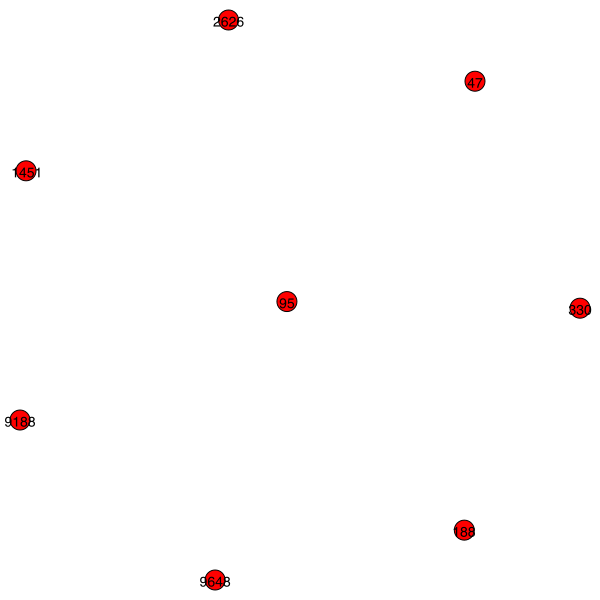

In [237]:
#                   TRY, IF YOU WANT!                 #
 ######################################################
#userNumberTrend(allNetwork)                           #
#edgeNumberTrend(allNetwork)                           #
#tricksterAnalysis(allNetwork)                         #
#communityMemberTrend(communityAffiliation, 190)       #
#communitiesNumberTrend(communityAffiliation)          #
#dissolvedCommunitiesTrend(communityAffiliation)       #
#creationCommunitiesTrend(communityAffiliation)        #
#retrieveCommunityGraph(allNetwork, communityId, netId)#
 ######################################################
#communityAffiliation = dict()

'''for i in range(0, len(allNetwork)):
    # print(allNetwork[i][4].summary())
    communityAffiliation[i] = addCommunitiesLabel(allNetwork[i][4], i)
    # addCommunitiesLabel(allNetwork[i][3], i)
    print(allNetwork[i][4].summary())
print("")'''
    
#communityStory = dict()
    
# communityStory = retrieveCommunityGraph(allNetwork, 190, 4)

# for day in communityStory:
#    print(communityStory[day].summary())
#    print("")

# print(len(list(communityStory[27].vs)))

ig.plot(communityStory[26])

# for vertex in communityStory[26].vs:
    # print(vertex['name'])
   

#print(communityStory)

# findDiplomats(allNetwork[0][1])

# for vertex in allNetwork[i][5].vs:
#    print(vertex)
# print(allNetwork[1][5].vs[2])
# print(len(allNetwork[1][5].es))

# 188

# I prefer keep a bin cell rather than cry because i need already written code but deleted....
Of course in the final release this will be delete